In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()
import calendar
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', 20)

# Loading data

In [2]:

# data_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results'
# save_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\maps'

data_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\removed_negative'
save_path = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\maps_removed_negative_all'

os.makedirs(save_path, exist_ok=True)
os.makedirs(os.path.join(save_path, 'place_plots'), exist_ok=True)




years = [2022]
months = list(range(1, 13))

landscan_daytime_fname =   r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_daytime_2021_CBG.csv"
landscan_nighttime_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Landscan_nighttime_2021_CBG.csv"

# hourly_popu_fname = fr"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
ACS_file = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
CBG_place_fname = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\CBG_place.gpkg'

# desktop 2018
# landscan_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_daytime_2021_CBG.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\adjusted_negative_hourly_population\CBG_population_hourly_{year}{month:02}.csv"
# hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"

CBG_2019_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\blockgroups2019.zip"


landscan_day_df = pd.read_csv(landscan_daytime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_day", "GEOID":"CBG"}).set_index("CBG").astype(int)
landscan_night_df = pd.read_csv(landscan_nighttime_fname, dtype={"GEOID":str}, usecols=['GEOID', 'SUM']).rename(columns={"SUM": "landscan_night", "GEOID":"CBG"}).set_index("CBG").astype(int)

ACS_df = pd.read_csv(ACS_file, dtype={'fips':str}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG").astype(int)
ACS_df = ACS_df.merge(landscan_day_df, left_index=True, right_index=True).merge(landscan_night_df, left_index=True, right_index=True)
ACS_df

totalpopulation  landscan_day  landscan_night
CBG                                                        
010010201001              730           392             580
010010201002             1263           436            1194
010010202001              835          1622             904
010010202002             1124          2566            1116
010010203001             2774           974            2254
...                       ...           ...             ...
560459511001             1450           951            1408
560459511002             1844           956            1798
560459513001             1314           803            1041
560459513002             1164          1489            1179
560459513003             1277          1255            1319

[216327 rows x 3 columns]

In [3]:
CBG_place_gdf = gpd.read_file(CBG_place_fname)

In [4]:
df_list = []
for year in years:
    for month in months:
        hourly_popu_fname = fr"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_{year}{month:02}.csv"
        print("Loading:", hourly_popu_fname)
        df = pd.read_csv(hourly_popu_fname, dtype={'CBG':str}).set_index('CBG').astype(int)  # int16: 16-bit signed integer (-32768 to 32767) WRONG!

        # remove this for entire US.
        # df = df[df.index.str.startswith('36061')]  # Manhattan 

        df_list.append(df)
        
all_df = pd.concat(df_list, axis=1)
df_list = []
# all_df

Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202201.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202202.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202203.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202204.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202205.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202206.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202207.csv
Loading: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\CBG_population_hourly_202208.csv
Loading: D:\OneD

In [5]:
all_df.dtypes
# df
# all_df.astype(np.int32)

2022-01-01 00:00:00    float64
2022-01-01 01:00:00    float64
2022-01-01 02:00:00    float64
2022-01-01 03:00:00    float64
2022-01-01 04:00:00    float64
                        ...   
2022-12-31 19:00:00    float64
2022-12-31 20:00:00    float64
2022-12-31 21:00:00    float64
2022-12-31 22:00:00    float64
2022-12-31 23:00:00    float64
Length: 8760, dtype: object

In [6]:
_, last_day = calendar.monthrange(year, months[-1])
hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')  # -{last_day} 23:00:00
all_df.index = all_df.index.str.zfill(12)
all_df.columns = hourly_index 
all_df

C:\tmp\ipykernel_64380\1581766503.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')  # -{last_day} 23:00:00


2022-01-01 00:00:00  2022-01-01 01:00:00  2022-01-01 02:00:00  \
CBG                                                                           
010010201001                832.0                437.0                517.0   
010010201002               2197.0               1840.0               2120.0   
010010202001                983.0                615.0                684.0   
010010202002               1417.0               1115.0               1123.0   
010010203001               2927.0               2979.0               3243.0   
...                           ...                  ...                  ...   
320030026051                  NaN                  NaN                  NaN   
361199830001                  NaN                  NaN                  NaN   
511959312003                  NaN                  NaN                  NaN   
040137233031                  NaN                  NaN                  NaN   
061150409022                  NaN                  NaN                  NaN   

              2022-01-01 03:00:00  2022-01-01 04:00:00  2022-01-01 05:00:00  \
CBG                                                                           
010010201001                592.0                648.0                675.0   
010010201002               2063.0               2205.0               2199.0   
010010202001                750.0                768.0                822.0   
010010202002               1003.0                981.0               1139.0   
010010203001               3676.0               3151.0               2916.0   
...                           ...                  ...                  ...   
320030026051                  NaN                  NaN                  NaN   
361199830001                  NaN                  NaN                  NaN   
511959312003                  NaN                  NaN                  NaN   
040137233031                  NaN                  NaN                  NaN   
061150409022                  NaN                  NaN                  NaN   

              2022-01-01 06:00:00  2022-01-01 07:00:00  2022-01-01 08:00:00  \
CBG                                                                           
010010201001                641.0                677.0                590.0   
010010201002               1742.0               1544.0               1189.0   
010010202001                758.0                767.0                748.0   
010010202002               1041.0               1196.0               1403.0   
010010203001               2870.0               2811.0               2691.0   
...                           ...                  ...                  ...   
320030026051                  NaN                  NaN                  NaN   
361199830001                  NaN                  NaN                  NaN   
511959312003                  NaN                  NaN                  NaN   
040137233031                  NaN                  NaN                  NaN   
061150409022                  NaN                  NaN                  NaN   

              2022-01-01 09:00:00  ...  2022-12-31 14:00:00  \
CBG                                ...                        
010010201001                582.0  ...                409.0   
010010201002               1049.0  ...                800.0   
010010202001                601.0  ...                 61.0   
010010202002               1121.0  ...                858.0   
010010203001               2629.0  ...               1380.0   
...                           ...  ...                  ...   
320030026051                  NaN  ...                  NaN   
361199830001                  NaN  ...                  NaN   
511959312003                  NaN  ...                -44.0   
040137233031                  NaN  ...                559.0   
061150409022                  NaN  ...                -32.0   

              2022-12-31 15:00:00  2022-12-31 16:00:00  2022-12-31 17:00:00  \
CBG                            

Manhattan, NY, had a almost 0 popultion in 8:00 AM and 15:00 PM with unknown reason. 2025.12.20, Huan: because setting CBG population cell dtype to int.16 tos save memory, but the maximum cell value is large than max(int.16), then memory overflow!!

In [7]:
CBG_place_hourly_gdf = CBG_place_gdf.merge(ACS_df, right_index=True,  left_on='CBG').merge(all_df, right_index=True, left_on='CBG')
CBG_place_hourly_gdf
# CBG_place_hourly_gdf

sub_area_ratio           CBG    place              NAME  \
0             0.991480  010730059033  0107000        Birmingham   
1             0.953754  010730059031  0107000        Birmingham   
2             0.945075  010730059053  0107000        Birmingham   
3             1.000000  010730059051  0107000        Birmingham   
4             1.000000  010730057023  0107000        Birmingham   
...                ...           ...      ...               ...   
146448        0.989965  560210004012  5671800     South Greeley   
146449        0.962990  560210004013  5629300  Fox Farm-College   
146450        0.899414  560210004022  5629300  Fox Farm-College   
146451        1.000000  560319594006  5683040         Wheatland   
146452        0.998854  560319594005  5683040         Wheatland   

                    NAMELSAD STUSPS STATE_NAME  \
0            Birmingham city     AL    Alabama   
1            Birmingham city     AL    Alabama   
2            Birmingham city     AL    Alabama   
3            Birmingham city     AL    Alabama   
4            Birmingham city     AL    Alabama   
...                      ...    ...        ...   
146448     South Greeley CDP     WY    Wyoming   
146449  Fox Farm-College CDP     WY    Wyoming   
146450  Fox Farm-College CDP     WY    Wyoming   
146451        Wheatland town     WY    Wyoming   
146452        Wheatland town     WY    Wyoming   

                                                 geometry  totalpopulation  \
0       MULTIPOLYGON (((-86.69174 33.60098, -86.69159 ...             1991   
1       MULTIPOLYGON (((-86.68297 33.59476, -86.68294 ...             2187   
2       MULTIPOLYGON (((-86.70047 33.61792, -86.70042 ...             2741   
3       MULTIPOLYGON (((-86.71176 33.59397, -86.71124 ...             1213   
4       MULTIPOLYGON (((-86.88307 33.47244, -86.88301 ...              412   
...                                                   ...              ...   
146448  MULTIPOLYGON (((-104.82115 41.08882, -104.8208...              597   
146449  MULTIPOLYGON (((-104.78868 41.10225, -104.7884...              680   
146450  MULTIPOLYGON (((-104.80266 41.11944, -104.8038...             2884   
146451  MULTIPOLYGON (((-104.96564 42.05622, -104.9655...              842   
146452  MULTIPOLYGON (((-104.98257 42.05634, -104.9825...             1294   

        landscan_day  ...  2022-12-31 14:00:00  2022-12-31 15:00:00  \
0               1060  ...                527.0                742.0   
1               1508  ...                814.0                605.0   
2               1134  ...               1460.0               1997.0   
3               1250  ...               1165.0               1389.0   
4                234  ...                457.0                557.0   
...              ...  ...                  ...                  ...   
146448           691  ...                269.0                 40.0   
146449           282  ...               -207.0                 41.0   
146450          1222  ...                275.0                 28.0   
146451          1540  ...               1079.0                546.0   
146452          1206  ...                691.0               1042.0   

        2022-12-31 16:00:00  2022-12-31 17:00:00  2022-12-31 18:00:00  \
0                     690.0                892.0               1091.0   
1                     765.0                878.0               1374.0   
2                    2027.0               2515.0               2232.0   
3                    1212.0               1086.0               1544.0   
4                     723.0                864.0                686.0   
...                     ...                  ...                  ...   
146448                 55.0                133.0                -23.0   
146449                 94.0                -12.0               -150.0   
146450                302.0                640.0                776.0   
146451                664.0               1206.0               1095.0   
146452   

In [8]:
# CBG_place_hourly_gdf
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\CBG_place_2022_population.csv'

# CBG_place_hourly_gdf.drop(columns=['geometry']).to_csv(saved_fname, index=False)

In [9]:
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\CBG_place_2022_population.gpkg'
# CBG_place_hourly_gdf.to_file(saved_fname, driver="GPKG")

In [17]:
CBG_place_hourly_gdf['NAMELSAD'].nunique()

10401

In [11]:
# df = CBG_place_hourly_gdf.query('NAME == "Myrtle Beach" ')
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Georgetown city"  and STUSPS == "SC"')
# df = CBG_place_hourly_gdf.query('NAME == "Ocean City" and STUSPS == "MD" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Miami Beach city')]
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Miami Beach city" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Daytona Beach city')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Port Aransas')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Capitola')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('St. Augustine')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Cape May')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('San Clemente')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Newport')].query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Solana Beach')] 
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Provincetown')]#.query('STATE_NAME == "Rhode Island" ')
# df = CBG_place_hourly_gdf.query('NAME == "State College" ')
# df = CBG_place_hourly_gdf.query('NAME == "Columbia" ').query('STUSPS == "SC" ')
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['NAMELSAD'].str.contains('Holden Beach town')]
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]  # Manhattan 
# df = CBG_place_hourly_gdf.query('NAME == "Mesa" ')
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Tracy city" and STUSPS == "CA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Commerce city" and STUSPS == "CA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Havelock city" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Benson town" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Belzoni city" and STUSPS == "MS" ')  # Catfish Festival Celebrates Mississippi’s Aquacultural History
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Holden Beach town" and STUSPS == "NC" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Carnation city" and STUSPS == "WA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Sammamish city" and STUSPS == "WA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Alpharetta city" and STUSPS == "GA" ') 
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Milford city (balance)" and STUSPS == "CT" ')
# df = CBG_place_hourly_gdf.query('NAMELSAD == "Guilford Center CDP" and STUSPS == "CT" ')
# https://www.ctinsider.com/shoreline/article/guilford-fair-2022-opens-with-help-of-volunteers-17441373.php
#   20,000 visitors expected for the 2022 Guilford Fair 

df = CBG_place_hourly_gdf.query('NAMELSAD == "West Cape May borough" and STUSPS == "NJ" ')

df

sub_area_ratio           CBG    place           NAME  \
87878        0.990885  340090219003  3478530  West Cape May   

                    NAMELSAD STUSPS  STATE_NAME  \
87878  West Cape May borough     NJ  New Jersey   

                                                geometry  totalpopulation  \
87878  MULTIPOLYGON (((-74.94244 38.94016, -74.94231 ...              601   

       landscan_day  ...  2022-12-31 14:00:00  2022-12-31 15:00:00  \
87878           743  ...                642.0                806.0   

       2022-12-31 16:00:00  2022-12-31 17:00:00  2022-12-31 18:00:00  \
87878                814.0                721.0               1038.0   

       2022-12-31 19:00:00  2022-12-31 20:00:00  2022-12-31 21:00:00  \
87878                778.0                721.0                663.0   

       2022-12-31 22:00:00  2022-12-31 23:00:00  
87878                569.0                548.0  

[1 rows x 8771 columns]

In [12]:
# CBG_place_hourly_gdf.query( 'STUSPS == "CT" ')['NAMELSAD'].unique()

In [13]:
df[['totalpopulation', 'geometry']].explore()

In [14]:
sum_series = df.iloc[:, 8:].sum()

ACS_popu = sum_series.iloc[0]
LandScan_day_popu = sum_series.iloc[1]
LandScan_night_popu = sum_series.iloc[2]

place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

mini_popu_ratio = 0.1
sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)
df['mini_popu'] = df['totalpopulation'] * 0.1

hourly_popu_df = df.iloc[:, 11:]
hourly_popu_df = hourly_popu_df.apply(lambda x: x.where(x >= 0, df['mini_popu']))
df = pd.concat([df.iloc[:, :11], hourly_popu_df.iloc[:, :-1]], axis=1)

c:\Users\hning6\AppData\Local\anaconda3\envs\geo\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Plot hourly map

In [24]:
import matplotlib.pyplot as plt
import gc

def plot_population(df, override=True):

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list()).replace(r'/', '_')
    saved_fname = os.path.join(save_path, 'place_plots',  f"{place_name}_{year}_{months[-1]:02}.png")

    if os.path.exists(saved_fname) and not override:
        # print(f"Plot exists: {saved_fname}, skip.")
        return

    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=0.6, linewidth=1.2)
    # plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=1)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='h')
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
    
    
    
    plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    
    # plt.title("Manhattan, New York", fontsize=18)
    
    plt.ylabel('Population', fontsize=14)
    plt.legend(title='Population', fontsize=12, title_fontsize=14, loc='upper left')
    plt.savefig(saved_fname, dpi=300, bbox_inches='tight')
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.tick_params(axis='y', which='both', labelsize=12)
    
    plt.close()
    # plt.show()
    del fig, ax
    gc.collect()
 
plot_population(df)

NameError: name 'STOP' is not defined

## generate plots for all places

In [ ]:

for place_name, group_df in tqdm(CBG_place_hourly_gdf.groupby(['NAMELSAD', 'STUSPS', 'place'])):

    # if group_df['totalpopulation'].sum() > 1000:
    #     continue

    sum_series = group_df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(group_df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)
    group_df['mini_popu'] = group_df['totalpopulation'] * 0.1

    hourly_popu_df = group_df.iloc[:, 11:]
    hourly_popu_df = hourly_popu_df.apply(lambda x: x.where(x >= 0, group_df['mini_popu']))
    group_df = pd.concat([group_df.iloc[:, :11], hourly_popu_df.iloc[:, :-1]], axis=1)

    plot_population(group_df, override=False)

     

 45%|████▌     | 5361/11847 [8:56:06<80:16:43, 44.56s/it]

In [ ]:
STOP

## For Manhattan

### for a month

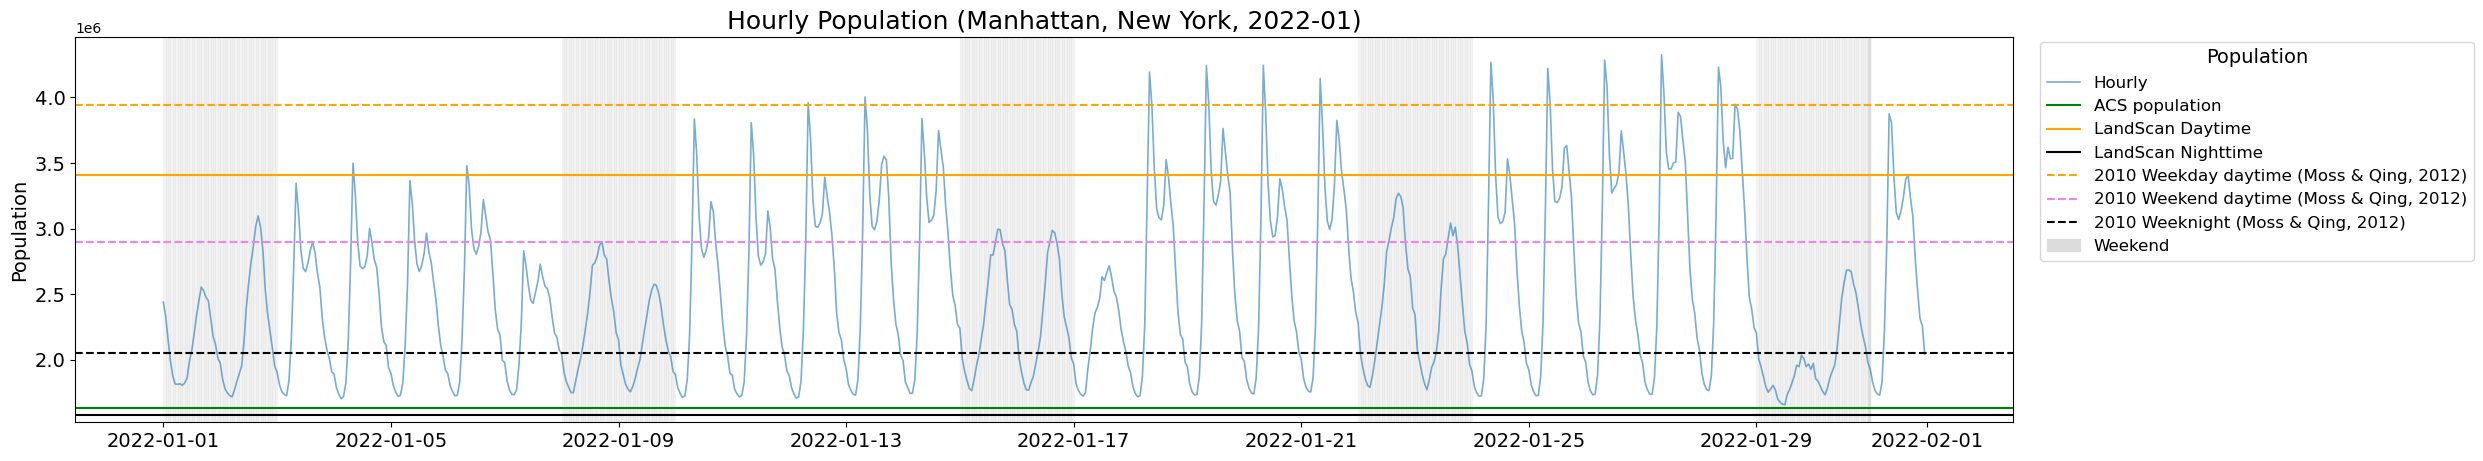

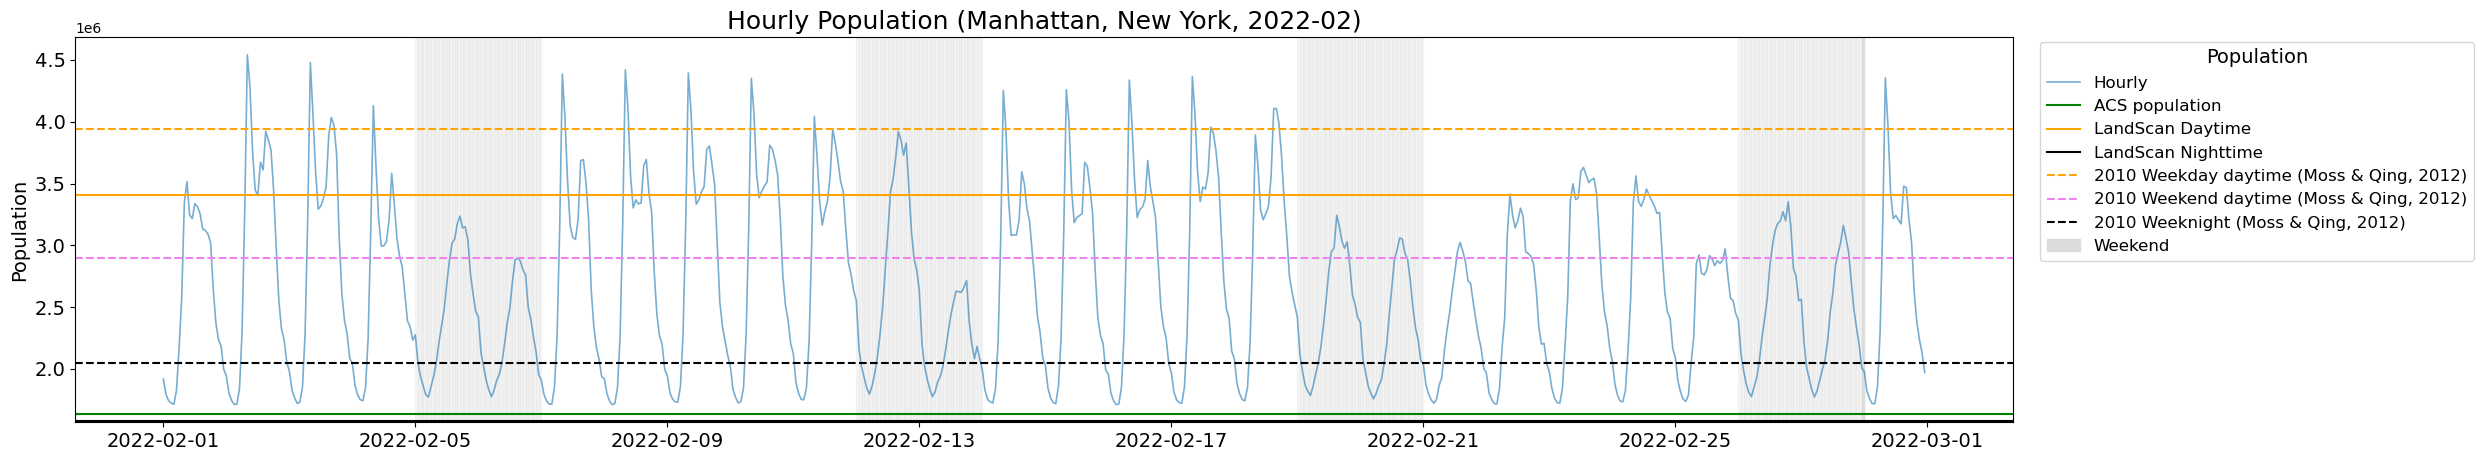

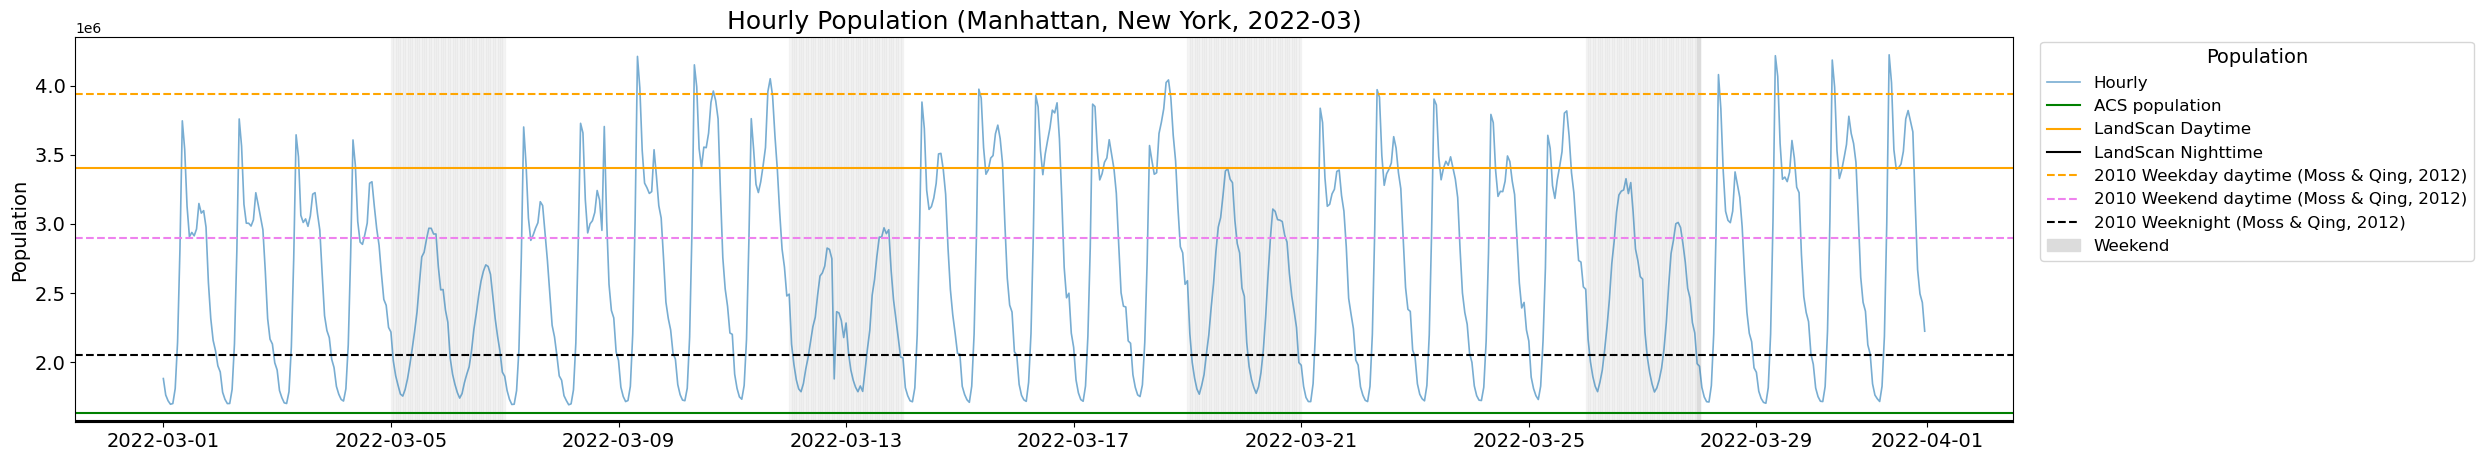

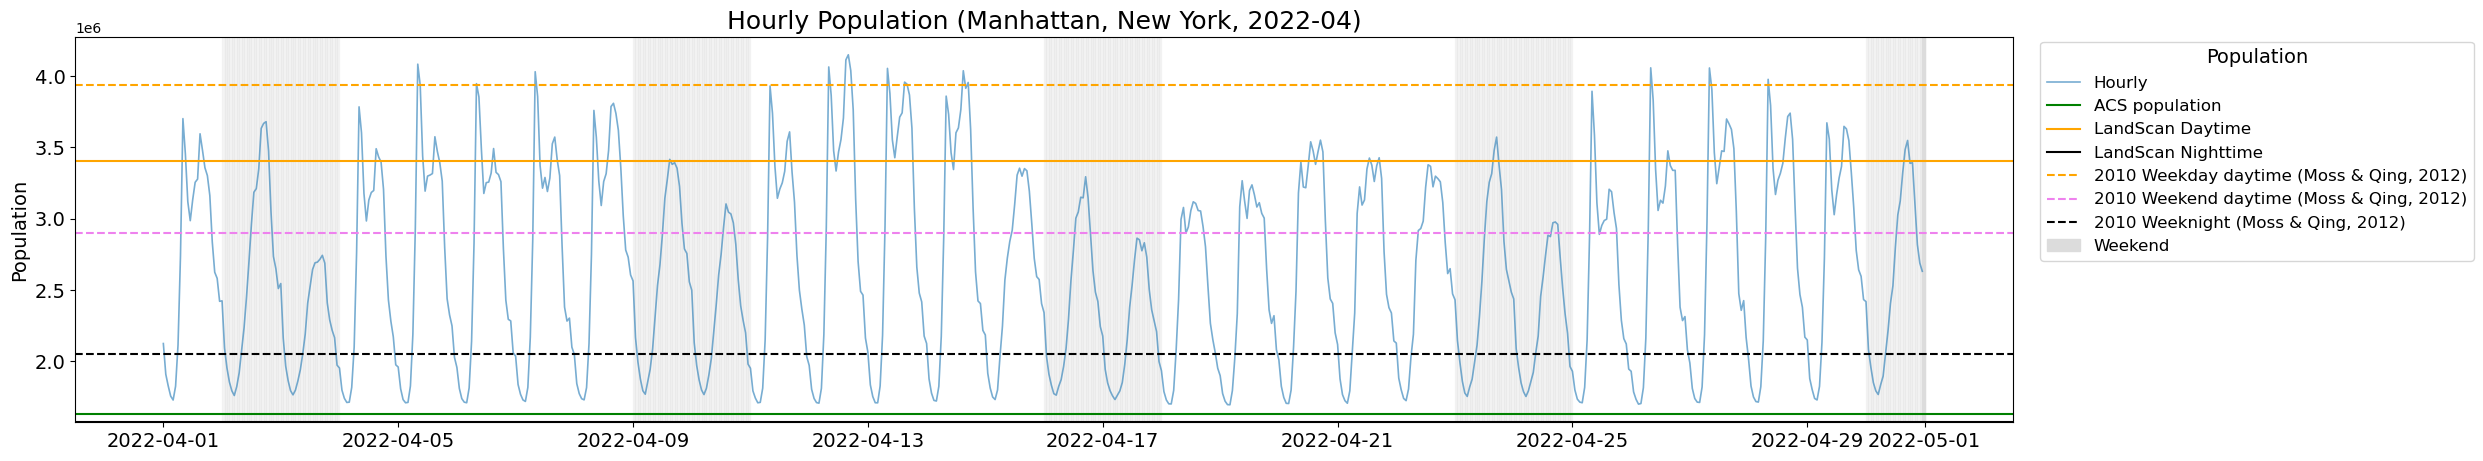

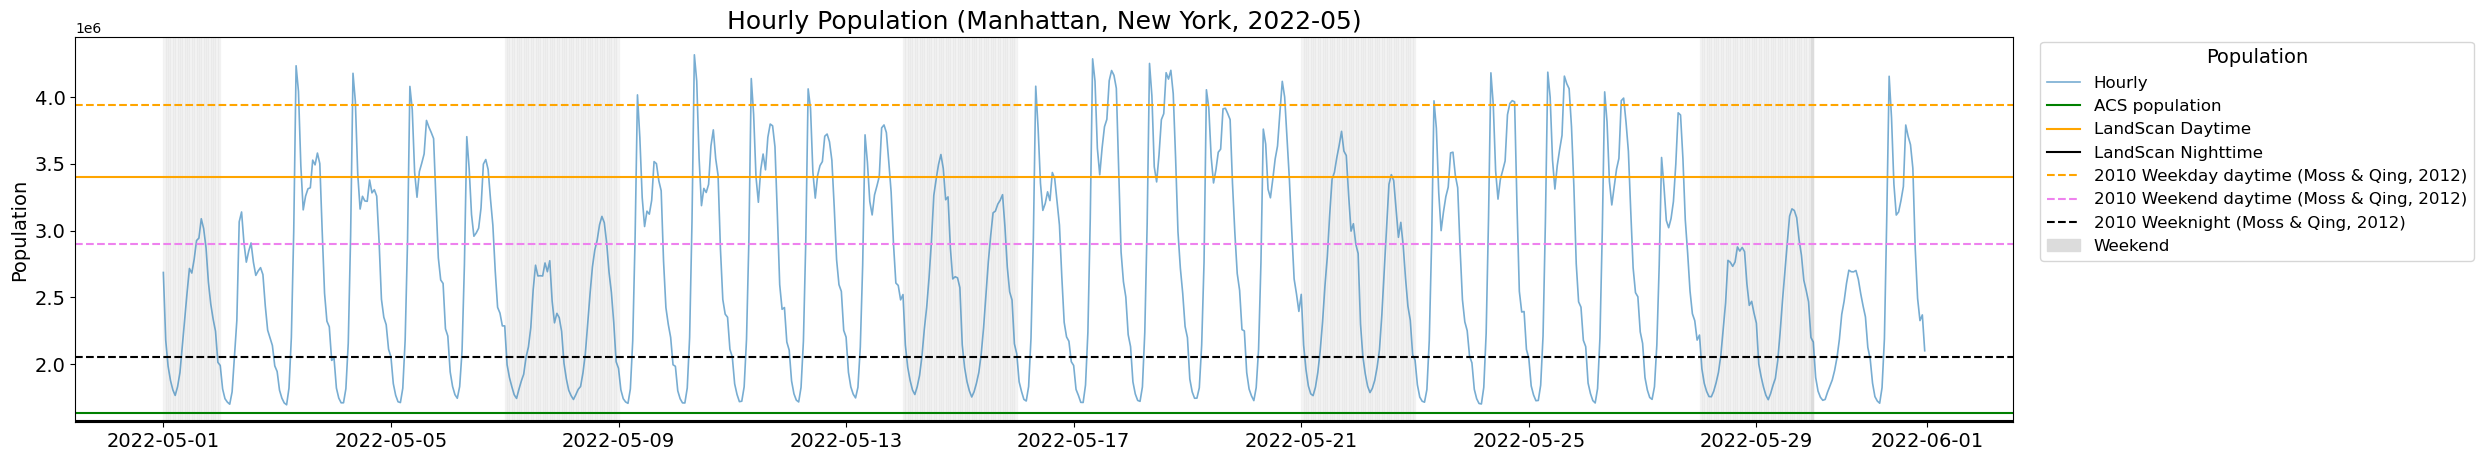

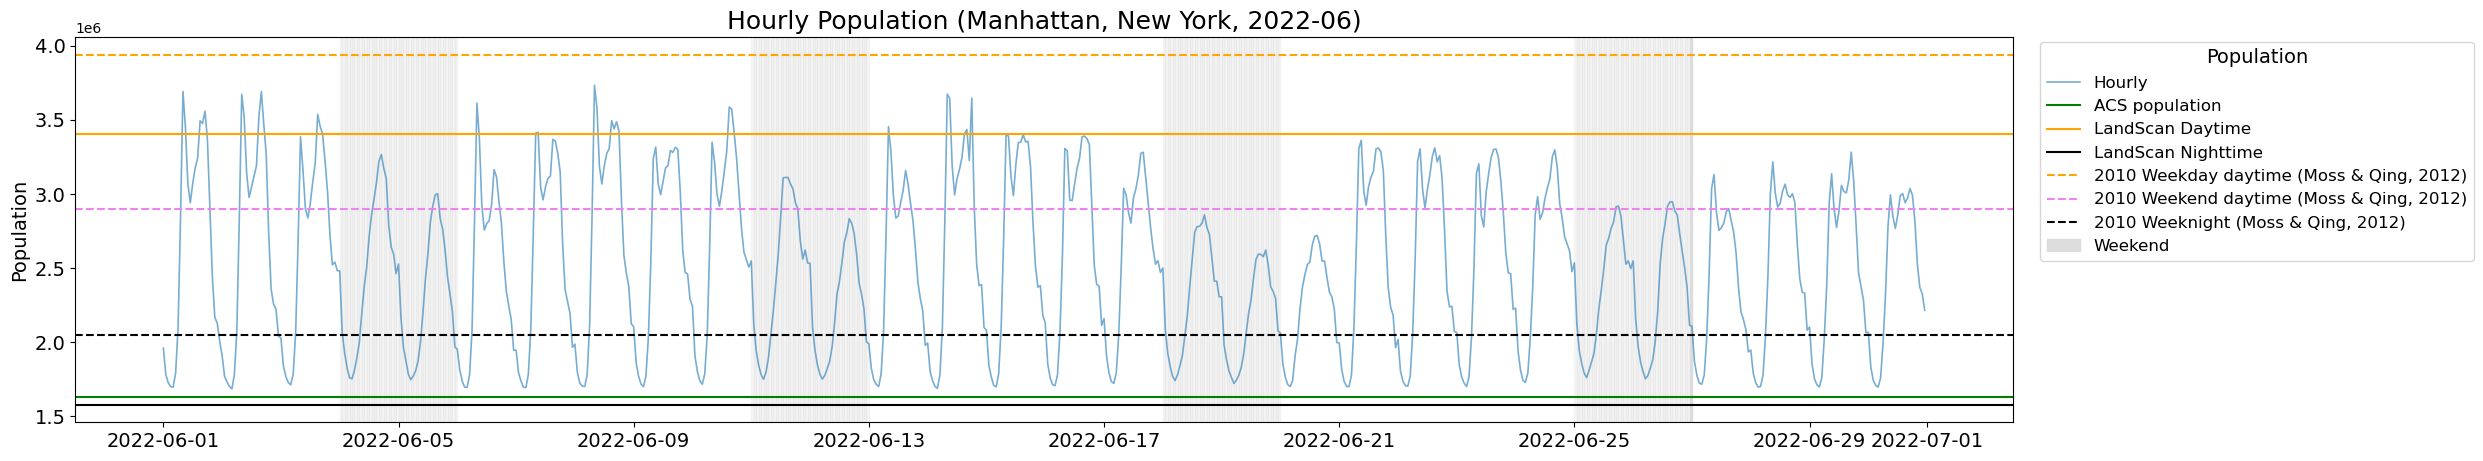

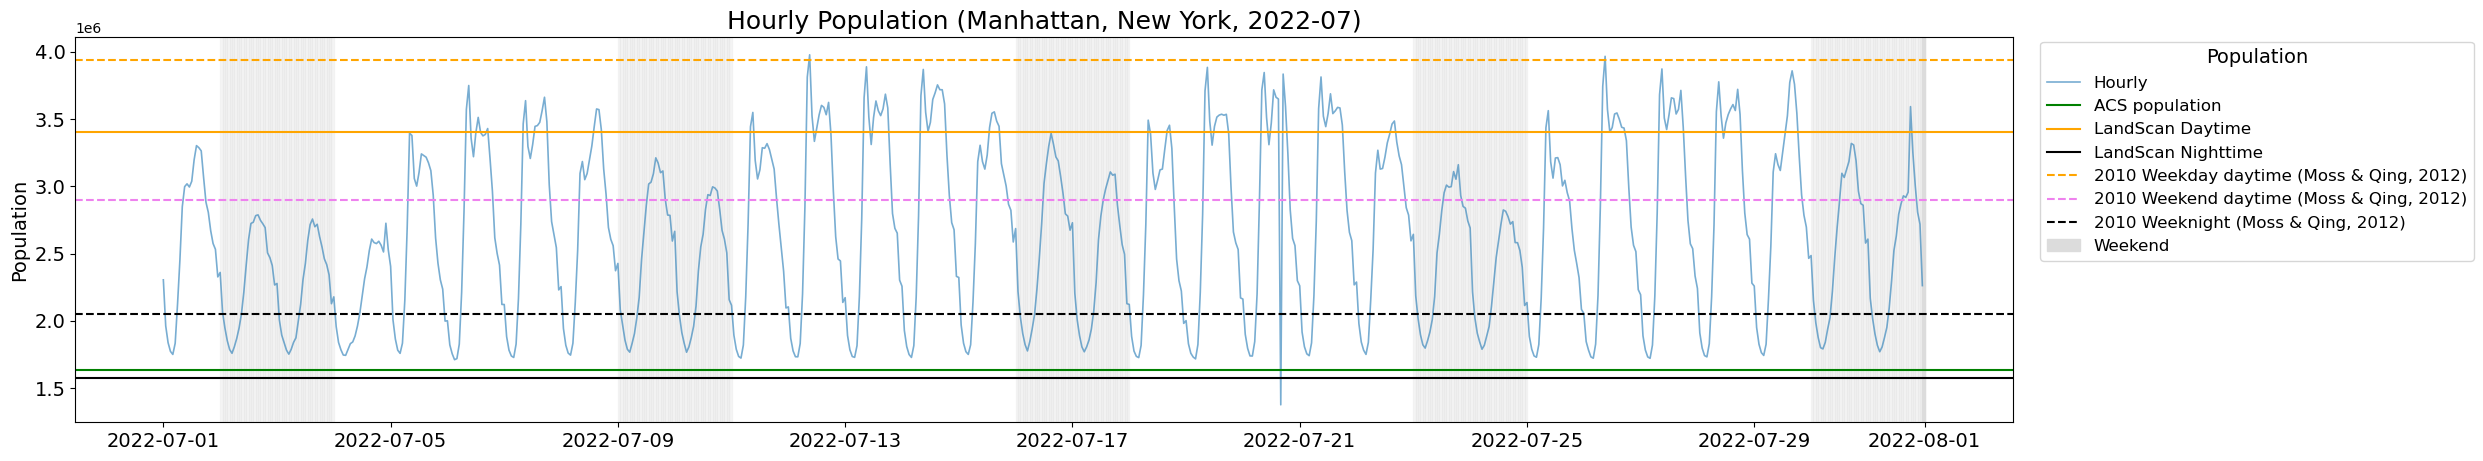

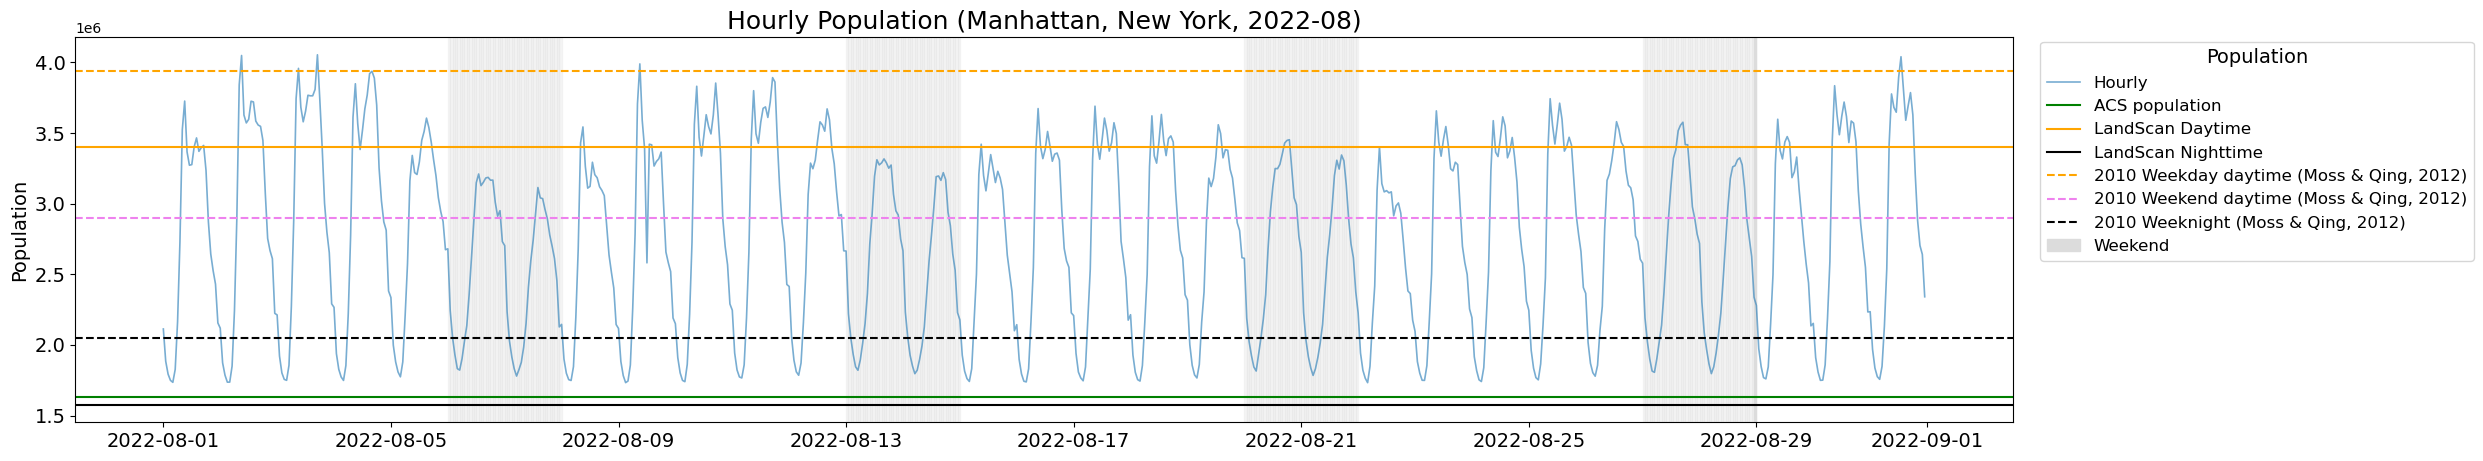

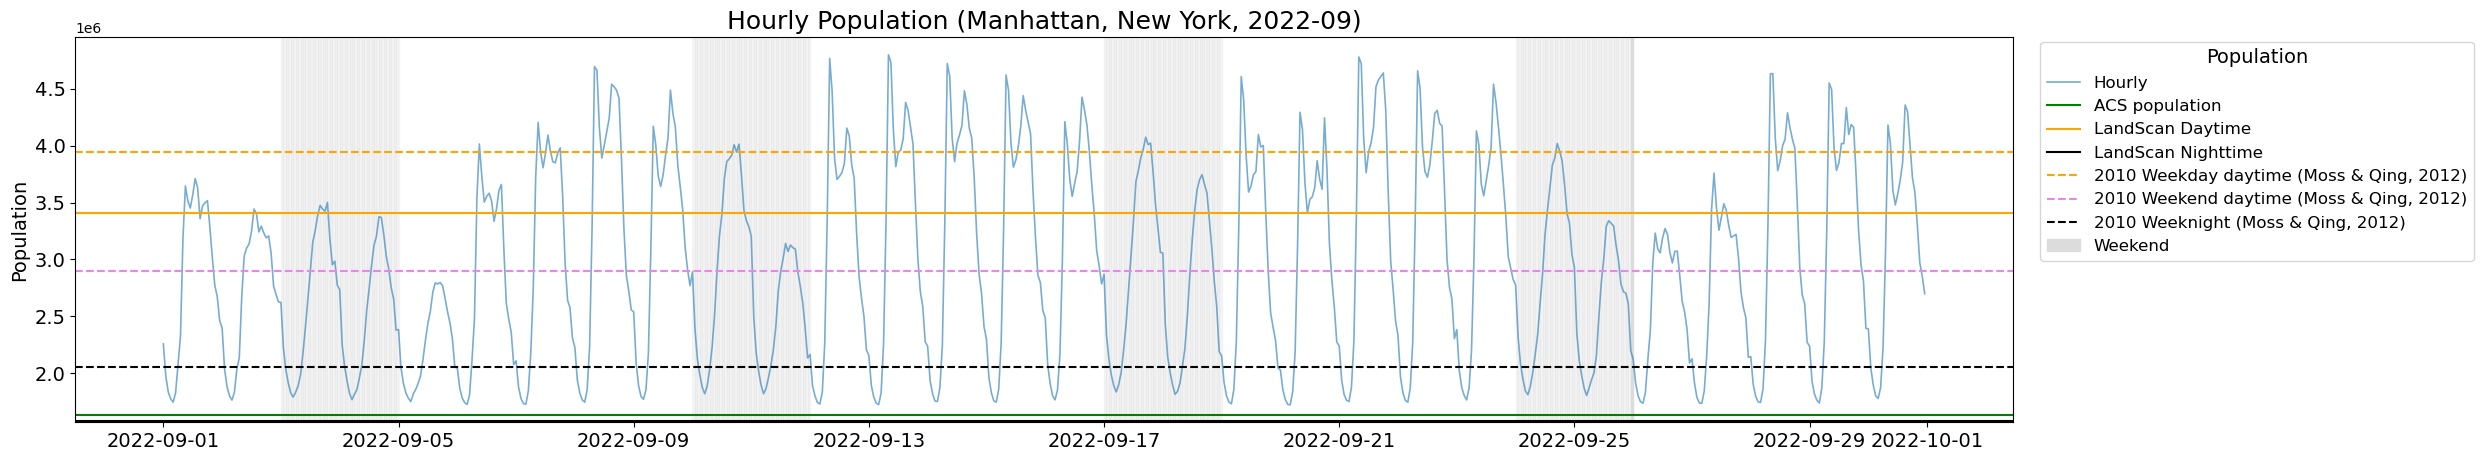

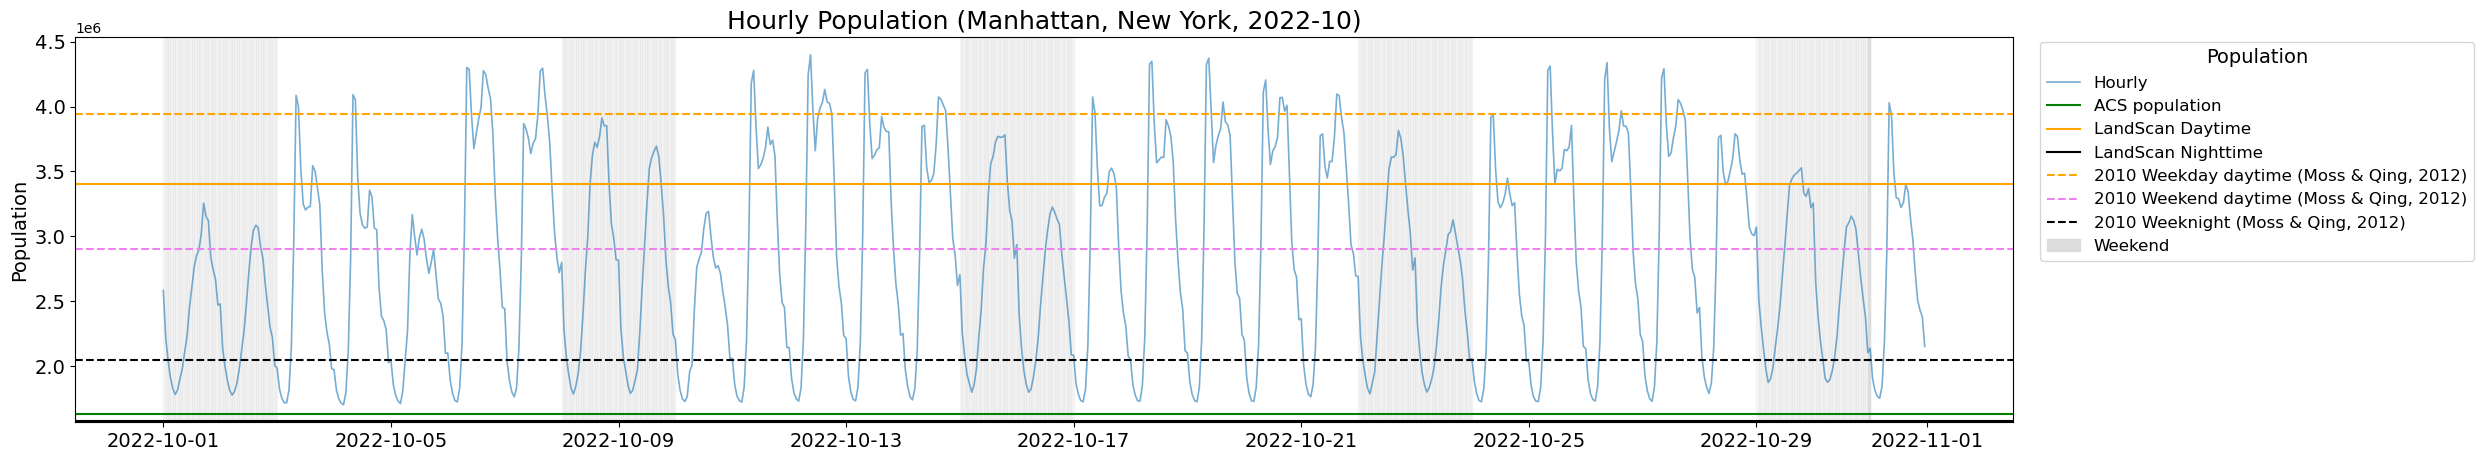

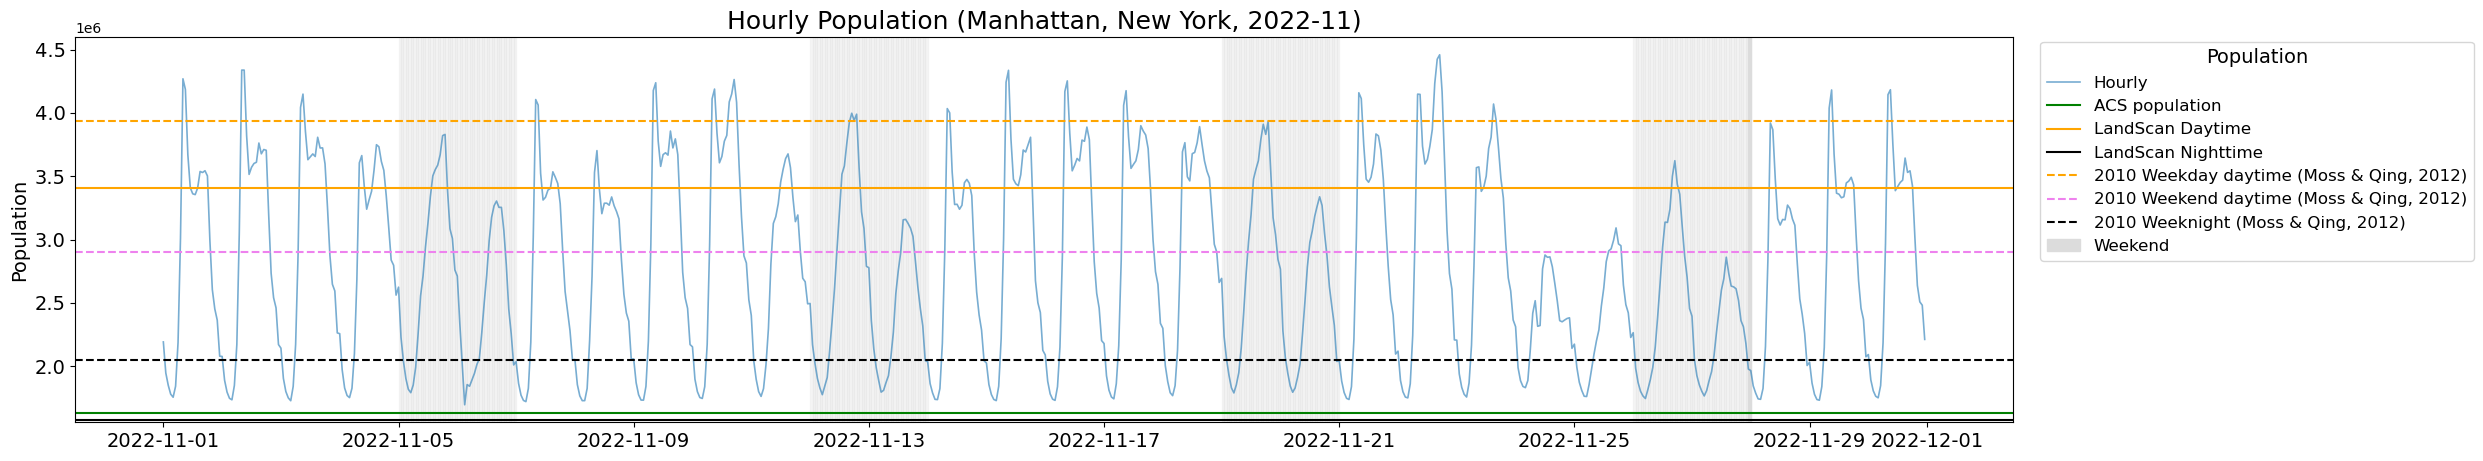

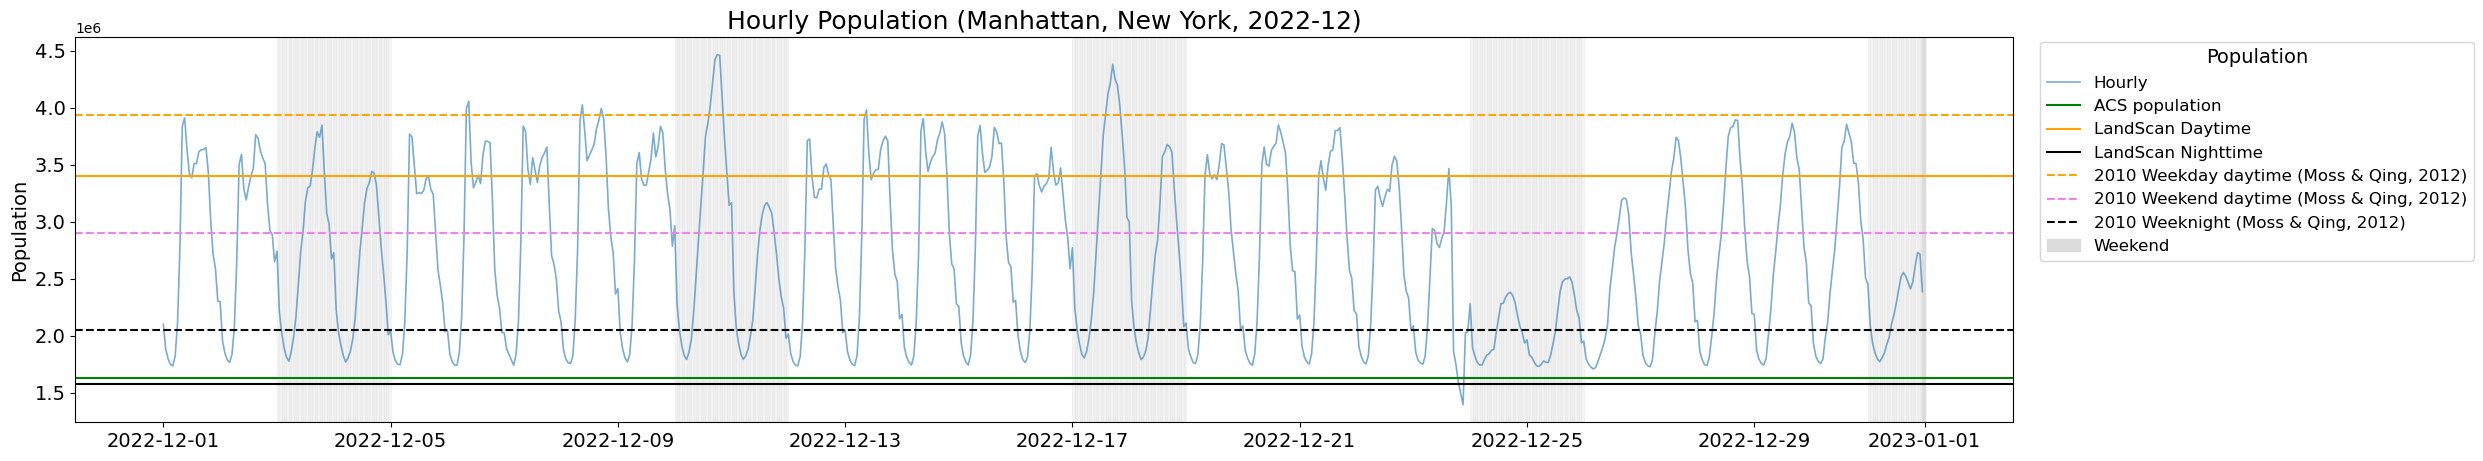

In [ ]:
import matplotlib.pyplot as plt

def plot_population(df):
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=0.6, linewidth=1.2)
    # plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=1)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 
    
    plt.axhline(y=3.94e6, color = 'orange', linestyle = '--', label="2010 Weekday daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.90e6, color = 'violet', linestyle = '--', label="2010 Weekend daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.05e6, color = 'black', linestyle = '--', label="2010 Weeknight (Moss & Qing, 2012)") 
    

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    # hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')
    # hourly_index = pd.date_range(start=f'{year}-06-01', end=f'{year}-07-{last_day} 23:00:00', freq='H')  # July
    hourly_index = df.columns[11:]
    hourly_index = pd.to_datetime(hourly_index)
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
    
    
    
    # plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    
    plt.title(f"Hourly Population (Manhattan, New York, {year}-{_month:02})", fontsize=18)
    
    plt.ylabel('Population', fontsize=14)
    plt.legend(title='Population', fontsize=14, title_fontsize=14)
    
    
    # plt.legend(title='Population', fontsize=14)
    plt.legend(title='Population', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.01, 1.01), loc='upper left')
    
    plt.tick_params(axis='x', which='both', labelsize=14)
    plt.tick_params(axis='y', which='both', labelsize=14)
    
    saved_fname = os.path.join(save_path, 'place_plots',   f"Manhattan_{_month:02}.png")
    plt.savefig(saved_fname, dpi=300, bbox_inches='tight', pad_inches=0.2)
    # plt.close()
    plt.show()

attri_columns = df.columns[:11]
hour_columns = pd.to_datetime(df.columns[11:])

for _month in range(1, 13):
    weekend_mask = hour_columns.month == _month
    temp_df = pd.concat(
        [df[attri_columns], df.iloc[:, 11:].loc[:, weekend_mask]],
        axis=1
                )
    plot_population(temp_df)  

### for a year

C:\tmp\ipykernel_36268\3620310557.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')


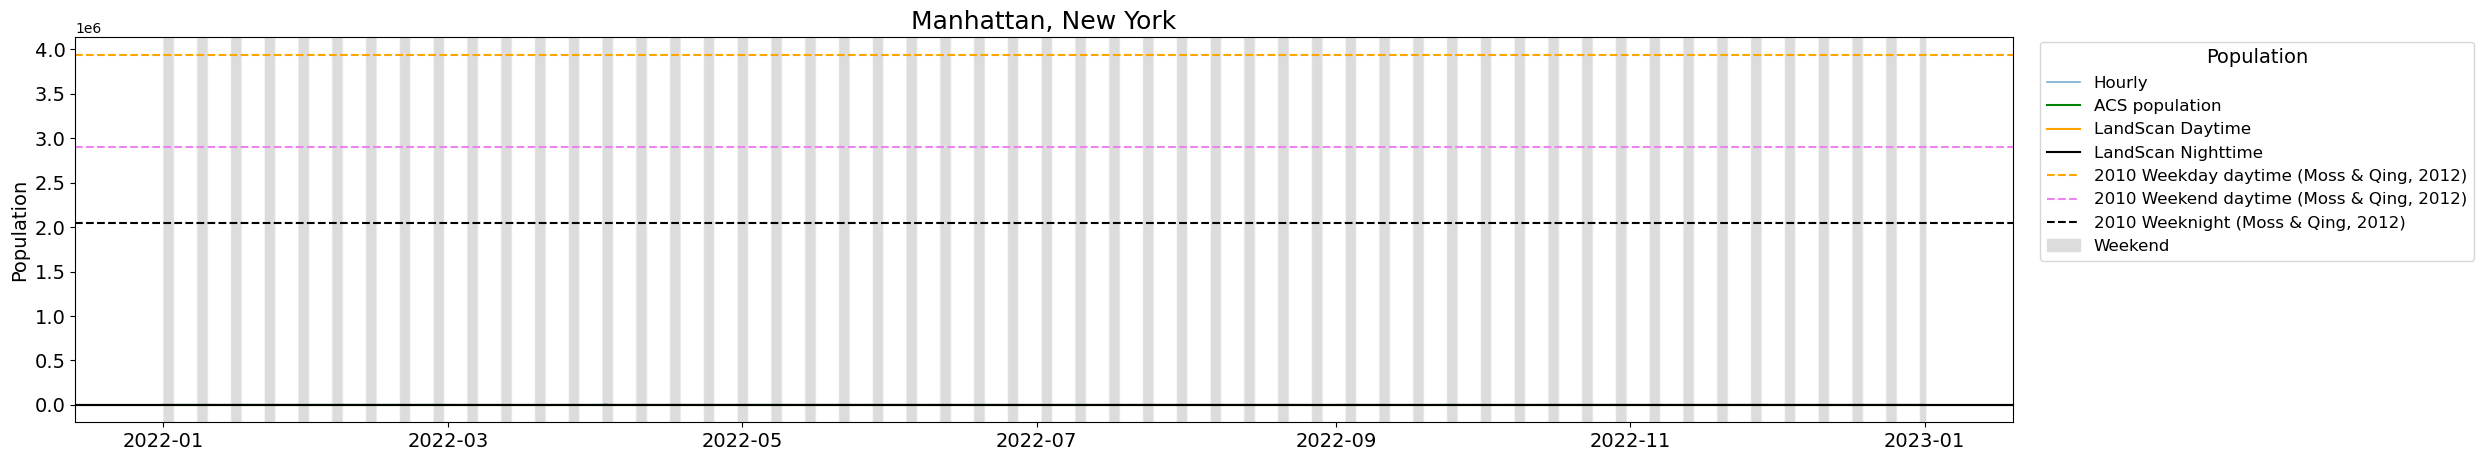

In [ ]:
import matplotlib.pyplot as plt

def plot_population(df):
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=0.6, linewidth=1.2)
    # plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=1)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 
    
    plt.axhline(y=3.94e6, color = 'orange', linestyle = '--', label="2010 Weekday daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.90e6, color = 'violet', linestyle = '--', label="2010 Weekend daytime (Moss & Qing, 2012)") 
    plt.axhline(y=2.05e6, color = 'black', linestyle = '--', label="2010 Weeknight (Moss & Qing, 2012)") 
    

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')
    # hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-01-{last_day} 23:00:00', freq='H')  # January
    # hourly_index = df.columns[10:]
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
     
    # plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    
    plt.title("Manhattan, New York", fontsize=18)
    
    plt.ylabel('Population', fontsize=14)
    plt.legend(title='Population', fontsize=14, title_fontsize=14)
    
    
    # plt.legend(title='Population', fontsize=14)
    plt.legend(title='Population', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.01, 1.01), loc='upper left')
    
    plt.tick_params(axis='x', which='both', labelsize=14)
    plt.tick_params(axis='y', which='both', labelsize=14)
    
    saved_fname = os.path.join(save_path, 'place_plots',   f"Manhattan_{year}.png")
    plt.savefig(saved_fname, dpi=300)
    # plt.close()
    plt.show()
 
plot_population(df.iloc[:, : ])  # all year


## For Myrtle bearch city

In [ ]:
df.iloc[:, 11:]

2022-01-01 00:00:00  2022-01-01 01:00:00  2022-01-01 02:00:00  \
79987               2017.0               2067.0               1335.0   

       2022-01-01 03:00:00  2022-01-01 04:00:00  2022-01-01 05:00:00  \
79987               1416.0               1637.0               1552.0   

       2022-01-01 06:00:00  2022-01-01 07:00:00  2022-01-01 08:00:00  \
79987               1545.0               1721.0               2230.0   

       2022-01-01 09:00:00  ...  2022-12-31 14:00:00  2022-12-31 15:00:00  \
79987               1982.0  ...               1541.0               1176.0   

       2022-12-31 16:00:00  2022-12-31 17:00:00  2022-12-31 18:00:00  \
79987               1393.0               1344.0               1507.0   

       2022-12-31 19:00:00  2022-12-31 20:00:00  2022-12-31 21:00:00  \
79987               1852.0               2019.0               2378.0   

       2022-12-31 22:00:00  2022-12-31 23:00:00  
79987               2032.0               2304.0  

[1 rows x 8760 columns]

C:\tmp\ipykernel_36268\3052161143.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')[start_hour:end_hour]


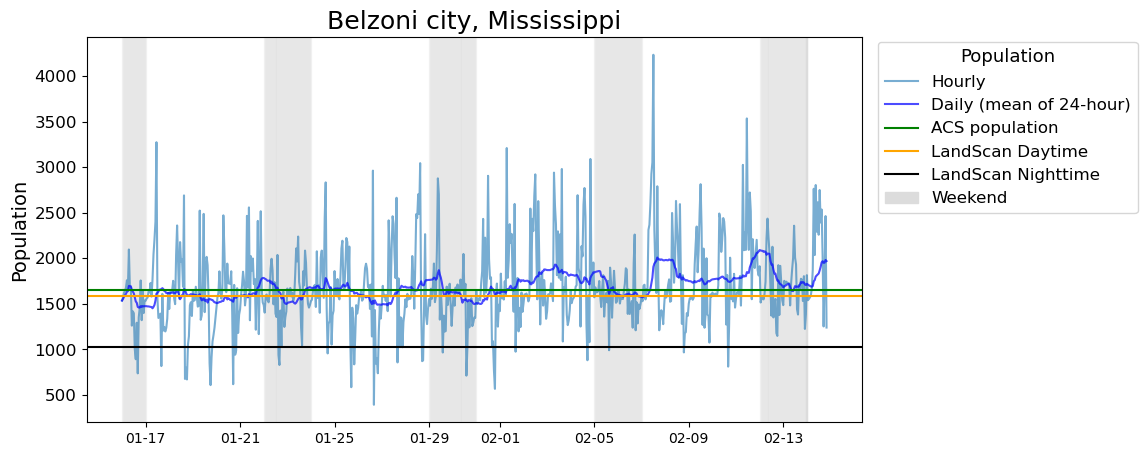

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_population(df):
    
    start_hour = 24 * 15
    end_hour = start_hour + 24 * 30
    fig, ax = plt.subplots(figsize = (10, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3 + start_hour:end_hour] , label="Hourly", alpha=0.6, linewidth=1.5)
    plt.plot(sum_series.iloc[3 + start_hour:end_hour].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=0.7)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')[start_hour:end_hour] 
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
    
    saved_fname = os.path.join(save_path, 'place_plots',   f"{place_name}_{year}_{months[-1]:02}.png")
    plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    plt.ylabel('Population', fontsize=14)
    plt.legend(title='Population', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.01, 1.01), loc='upper left')
    plt.savefig(saved_fname, dpi=150)
    # plt.legend(title='Population', fontsize=14)
    plt.tick_params(axis='x', which='both', labelsize=10)
    plt.tick_params(axis='y', which='both', labelsize=12)
    myFmt = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    
    # plt.close()
    plt.show()
 
plot_population(df)

In [ ]:
df.shape[1] # df
# df

8771

C:\tmp\ipykernel_36268\820736951.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')[start_hour:end_hour]


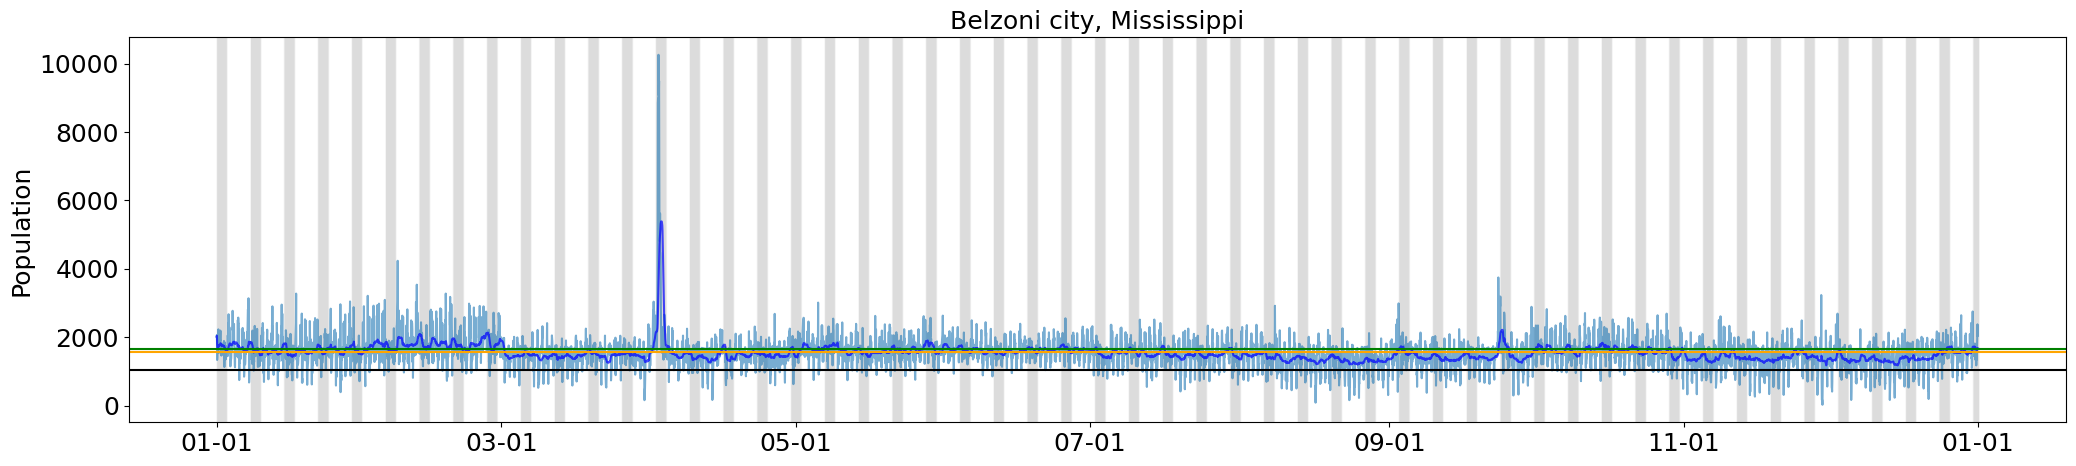

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_population(df):
    
    start_hour = 0
    end_hour = df.shape[1] 
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)

    plt.plot(sum_series.iloc[3 + start_hour:end_hour] , label="Hourly", alpha=0.6, linewidth=1.5)
    plt.plot(sum_series.iloc[3 + start_hour:end_hour].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=0.7)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')[start_hour:end_hour] 
    for start in hourly_index[hourly_index.weekday >= 5]:
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=0.25)
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
    
    saved_fname = os.path.join(save_path, 'place_plots',   f"{place_name}_{year}_{months[-1]:02}.png")
    plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    plt.ylabel('Population', fontsize=18)
    # plt.legend(title='Population', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.01, 1.01), loc='upper left')
    plt.savefig(saved_fname, dpi=150)
    # plt.legend(title='Population', fontsize=14)
    plt.tick_params(axis='x', which='both', labelsize=18)
    plt.tick_params(axis='y', which='both', labelsize=18)
    myFmt = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_major_formatter(myFmt)
    
    # plt.close()
    plt.show()
 
plot_population(df)

## Plot day-night time

C:\tmp\ipykernel_36268\3085520835.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')


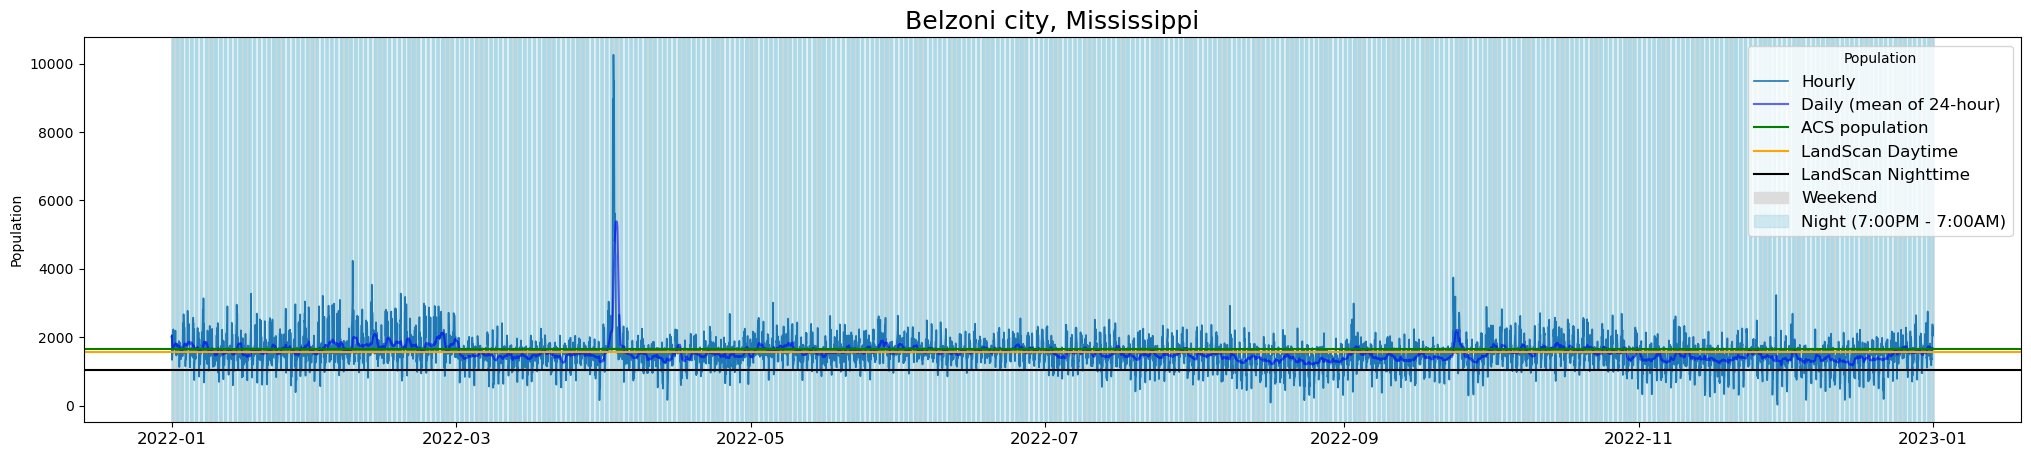

In [ ]:
import matplotlib.pyplot as plt

def plot_population_day_night(df):
    fig, ax = plt.subplots(figsize = (25, 5))
    sum_series = df.iloc[:, 8:].sum()

    ACS_popu = sum_series.iloc[0]
    LandScan_day_popu = sum_series.iloc[1]
    LandScan_night_popu = sum_series.iloc[2]

    place_name = '_'.join(df[['NAMELSAD', 'STUSPS', 'place']].iloc[0].to_list())

    mini_popu_ratio = 0.1
    sum_series = sum_series.mask(sum_series < 0, ACS_popu * mini_popu_ratio)
    
    plt.plot(sum_series.iloc[3:], label="Hourly", alpha=1, linewidth=1.2)

    
    plt.plot(sum_series.iloc[3:].rolling(window=24, min_periods=1).mean(), label="Daily (mean of 24-hour)", color='blue', alpha=0.6)  # rolling 24 hours

    plt.axhline(y=ACS_popu, color = 'green', linestyle = '-', label="ACS population") 
    plt.axhline(y=LandScan_day_popu, color = 'orange', linestyle = '-', label="LandScan Daytime") 
    plt.axhline(y=LandScan_night_popu, color = 'black', linestyle = '-', label="LandScan Nighttime") 

    # grey weekends
    _, last_day = calendar.monthrange(year, months[-1])
    hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')
    
    for start in hourly_index[hourly_index.weekday >= 5]:  # Draw weekend
        plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1)
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='gainsboro', alpha=1, label='Weekend')
        
    for start in hourly_index:
        # print(start)
        if 7 < start.hour <= 19:  # day
            # print(start.hour)
            pass
        else:  # night  (19:00 - 7:00)
            # print(start.hour)
            plt.axvspan(start, start + pd.Timedelta(hours=1), color='lightblue', alpha=0.5)  #, color='gainsboro',  alpha=0.02
            
    plt.axvspan(start, start + pd.Timedelta(hours=1), color='lightblue', alpha=0.5, label='Night (7:00PM - 7:00AM)')
        # ChatGPT make 'hours' as 'days', wrong! Hard to find!
        
    

    saved_fname = os.path.join(save_path, 'place_plots',   f"{place_name}_{year}_{months[-1]:02}_daynight.png")  
    plt.title(df.iloc[0]['NAMELSAD'] + ", " + df.iloc[0]['STATE_NAME'], fontsize=18)
    plt.ylabel('Population')
    plt.legend(title='Population', fontsize=12)
    plt.tick_params(axis='x', which='both', labelsize=12)
    plt.savefig(saved_fname, dpi=300)
    # plt.close()
    plt.show()
 
plot_population_day_night(df)

In [ ]:
hourly_index[hourly_index.hour >= 7]
hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')
hourly_index
hourly_index[24].hour

C:\tmp\ipykernel_36268\1934886465.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{months[0]:02}-01', end=f'{year}-{months[-1]:02}-{last_day} 23:00:00', freq='H')


0

In [ ]:
# STOP

# Show the map

In [ ]:
CBG_2019_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\blockgroups2019.zip"

In [ ]:
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12)


In [ ]:
CBG2019_gdf

GEOID                                           geometry  \
0       010730059033  POLYGON ((-86.69206 33.60022, -86.69174 33.600...   
1       010730059031  POLYGON ((-86.68307 33.59456, -86.68297 33.594...   
2       010730059053  POLYGON ((-86.70049 33.61777, -86.70047 33.617...   
3       010730059051  POLYGON ((-86.71185 33.59383, -86.71176 33.593...   
4       010730057023  POLYGON ((-86.88311 33.47224, -86.88307 33.472...   
...              ...                                                ...   
220328  720210302002  POLYGON ((-66.14085 18.38643, -66.14022 18.389...   
220329  720210314012  POLYGON ((-66.16869 18.38156, -66.1675 18.3820...   
220330  720210312021  POLYGON ((-66.18304 18.38045, -66.18263 18.380...   
220331  720531504003  POLYGON ((-65.64082 18.341, -65.64019 18.34176...   
220332  720531501044  POLYGON ((-65.63509 18.3654, -65.63474 18.3655...   

       county_FIPS           CBG  
0            01073  010730059033  
1            01073  010730059031  
2            01073  010730059053  
3            01073  010730059051  
4            01073  010730057023  
...            ...           ...  
220328       72021  720210302002  
220329       72021  720210314012  
220330       72021  720210312021  
220331       72053  720531504003  
220332       72053  720531501044  

[220333 rows x 4 columns]

In [ ]:
year = 2022
month = 1
day = 19

hourly_index = pd.date_range(start=f'{year}-{month:02}-{day:02}', end=f'2022-{month:02}-{day:02} 23:00:00', freq='H')
try:
    day_df = df.set_index('CBG')
except: 
    pass
day_df = day_df[hourly_index]
vmax = day_df.mean(axis=1).mean() + day_df.mean(axis=1).std() * 3
print("vmax:", vmax)
day_df.max().max()
# hourly_index

vmax: nan


C:\tmp\ipykernel_36268\4288601793.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{month:02}-{day:02}', end=f'2022-{month:02}-{day:02} 23:00:00', freq='H')


np.float64(2525.0)

In [ ]:
# df.set_index('CBG')
day_df.max()

2022-01-19 00:00:00    1638.0
2022-01-19 01:00:00    1535.0
2022-01-19 02:00:00    1543.0
2022-01-19 03:00:00    1689.0
2022-01-19 04:00:00    1580.0
2022-01-19 05:00:00    1471.0
2022-01-19 06:00:00    1479.0
2022-01-19 07:00:00    2525.0
2022-01-19 08:00:00    1326.0
2022-01-19 09:00:00    1373.0
2022-01-19 10:00:00    1745.0
2022-01-19 11:00:00    2489.0
2022-01-19 12:00:00    1410.0
2022-01-19 13:00:00    1893.0
2022-01-19 14:00:00    2017.0
2022-01-19 15:00:00    1927.0
2022-01-19 16:00:00    1559.0
2022-01-19 17:00:00     850.0
2022-01-19 18:00:00     609.0
2022-01-19 19:00:00     912.0
2022-01-19 20:00:00    1089.0
2022-01-19 21:00:00    1159.0
2022-01-19 22:00:00    1239.0
2022-01-19 23:00:00    1352.0
dtype: float64

In [ ]:
df.query("CBG == '360610143001' ")

Empty GeoDataFrame
Columns: [sub_area_ratio, CBG, place, NAME, NAMELSAD, STUSPS, STATE_NAME, geometry, totalpopulation, landscan_day, landscan_night, 2022-01-01 00:00:00, 2022-01-01 01:00:00, 2022-01-01 02:00:00, 2022-01-01 03:00:00, 2022-01-01 04:00:00, 2022-01-01 05:00:00, 2022-01-01 06:00:00, 2022-01-01 07:00:00, 2022-01-01 08:00:00, 2022-01-01 09:00:00, 2022-01-01 10:00:00, 2022-01-01 11:00:00, 2022-01-01 12:00:00, 2022-01-01 13:00:00, 2022-01-01 14:00:00, 2022-01-01 15:00:00, 2022-01-01 16:00:00, 2022-01-01 17:00:00, 2022-01-01 18:00:00, 2022-01-01 19:00:00, 2022-01-01 20:00:00, 2022-01-01 21:00:00, 2022-01-01 22:00:00, 2022-01-01 23:00:00, 2022-01-02 00:00:00, 2022-01-02 01:00:00, 2022-01-02 02:00:00, 2022-01-02 03:00:00, 2022-01-02 04:00:00, 2022-01-02 05:00:00, 2022-01-02 06:00:00, 2022-01-02 07:00:00, 2022-01-02 08:00:00, 2022-01-02 09:00:00, 2022-01-02 10:00:00, 2022-01-02 11:00:00, 2022-01-02 12:00:00, 2022-01-02 13:00:00, 2022-01-02 14:00:00, 2022-01-02 15:00:00, 2022-01-02 16:00:00, 2022-01-02 17:00:00, 2022-01-02 18:00:00, 2022-01-02 19:00:00, 2022-01-02 20:00:00, 2022-01-02 21:00:00, 2022-01-02 22:00:00, 2022-01-02 23:00:00, 2022-01-03 00:00:00, 2022-01-03 01:00:00, 2022-01-03 02:00:00, 2022-01-03 03:00:00, 2022-01-03 04:00:00, 2022-01-03 05:00:00, 2022-01-03 06:00:00, 2022-01-03 07:00:00, 2022-01-03 08:00:00, 2022-01-03 09:00:00, 2022-01-03 10:00:00, 2022-01-03 11:00:00, 2022-01-03 12:00:00, 2022-01-03 13:00:00, 2022-01-03 14:00:00, 2022-01-03 15:00:00, 2022-01-03 16:00:00, 2022-01-03 17:00:00, 2022-01-03 18:00:00, 2022-01-03 19:00:00, 2022-01-03 20:00:00, 2022-01-03 21:00:00, 2022-01-03 22:00:00, 2022-01-03 23:00:00, 2022-01-04 00:00:00, 2022-01-04 01:00:00, 2022-01-04 02:00:00, 2022-01-04 03:00:00, 2022-01-04 04:00:00, 2022-01-04 05:00:00, 2022-01-04 06:00:00, 2022-01-04 07:00:00, 2022-01-04 08:00:00, 2022-01-04 09:00:00, 2022-01-04 10:00:00, 2022-01-04 11:00:00, 2022-01-04 12:00:00, 2022-01-04 13:00:00, 2022-01-04 14:00:00, 2022-01-04 15:00:00, 2022-01-04 16:00:00, ...]
Index: []

[0 rows x 8771 columns]

In [ ]:
# df.index.astype(str).zfill(5
# merged_gdf

<Axes: >

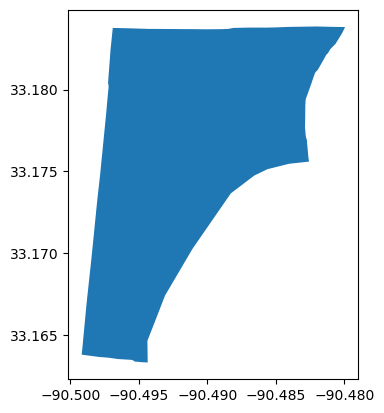

In [ ]:
merged_gdf = CBG2019_gdf.merge(day_df, left_on='CBG', right_index=True)
merged_gdf.plot()

In [ ]:
merged_gdf.columns.astype(str)

Index(['GEOID', 'geometry', 'county_FIPS', 'CBG', '2022-01-19 00:00:00',
       '2022-01-19 01:00:00', '2022-01-19 02:00:00', '2022-01-19 03:00:00',
       '2022-01-19 04:00:00', '2022-01-19 05:00:00', '2022-01-19 06:00:00',
       '2022-01-19 07:00:00', '2022-01-19 08:00:00', '2022-01-19 09:00:00',
       '2022-01-19 10:00:00', '2022-01-19 11:00:00', '2022-01-19 12:00:00',
       '2022-01-19 13:00:00', '2022-01-19 14:00:00', '2022-01-19 15:00:00',
       '2022-01-19 16:00:00', '2022-01-19 17:00:00', '2022-01-19 18:00:00',
       '2022-01-19 19:00:00', '2022-01-19 20:00:00', '2022-01-19 21:00:00',
       '2022-01-19 22:00:00', '2022-01-19 23:00:00'],
      dtype='object')

In [ ]:
# merged_gdf.index = 

In [ ]:
merged_gdf.columns[15]
merged_gdf

GEOID                                           geometry  \
108026  280539503003  POLYGON ((-90.49912 33.16415, -90.49892 33.165...   

       county_FIPS           CBG  2022-01-19 00:00:00  2022-01-19 01:00:00  \
108026       28053  280539503003               1638.0               1535.0   

        2022-01-19 02:00:00  2022-01-19 03:00:00  2022-01-19 04:00:00  \
108026               1543.0               1689.0               1580.0   

        2022-01-19 05:00:00  ...  2022-01-19 14:00:00  2022-01-19 15:00:00  \
108026               1471.0  ...               2017.0               1927.0   

        2022-01-19 16:00:00  2022-01-19 17:00:00  2022-01-19 18:00:00  \
108026               1559.0                850.0                609.0   

        2022-01-19 19:00:00  2022-01-19 20:00:00  2022-01-19 21:00:00  \
108026                912.0               1089.0               1159.0   

        2022-01-19 22:00:00  2022-01-19 23:00:00  
108026               1239.0               1352.0  

[1 rows x 28 columns]

<Axes: >

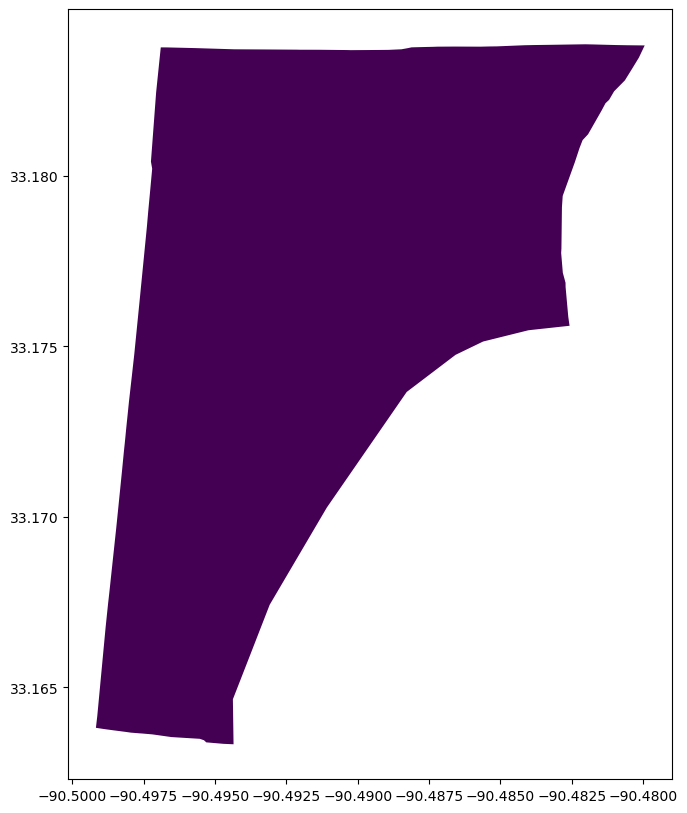

In [ ]:
# t = merged_gdf.copy()
# t.columns = t.columns.astype(str)
# t.query("CBG == '360610143001' ").explore()
# central_park = '360610143001'
time_stamp = pd.to_datetime(f'2022-01-19 08:00:00')
# merged_gdf.explore(column=time_stamp)
# merged_gdf.explore(column=f'2022-01-19 08:00:00')
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.columns = merged_gdf.columns.astype(str)
# merged_gdf.explore(column='2022-01-19 08:00:00')
merged_gdf.plot(column=time_stamp.strftime('%Y-%m-%d %H:%M:%S'), ax=ax)
# merged_gdf

In [ ]:
merged_gdf

GEOID                                           geometry  \
108026  280539503003  POLYGON ((-90.49912 33.16415, -90.49892 33.165...   

       county_FIPS           CBG  2022-01-19 00:00:00  2022-01-19 01:00:00  \
108026       28053  280539503003               1638.0               1535.0   

        2022-01-19 02:00:00  2022-01-19 03:00:00  2022-01-19 04:00:00  \
108026               1543.0               1689.0               1580.0   

        2022-01-19 05:00:00  ...  2022-01-19 14:00:00  2022-01-19 15:00:00  \
108026               1471.0  ...               2017.0               1927.0   

        2022-01-19 16:00:00  2022-01-19 17:00:00  2022-01-19 18:00:00  \
108026               1559.0                850.0                609.0   

        2022-01-19 19:00:00  2022-01-19 20:00:00  2022-01-19 21:00:00  \
108026                912.0               1089.0               1159.0   

        2022-01-19 22:00:00  2022-01-19 23:00:00  
108026               1239.0               1352.0  

[1 rows x 28 columns]

TypeError: no numeric data to plot

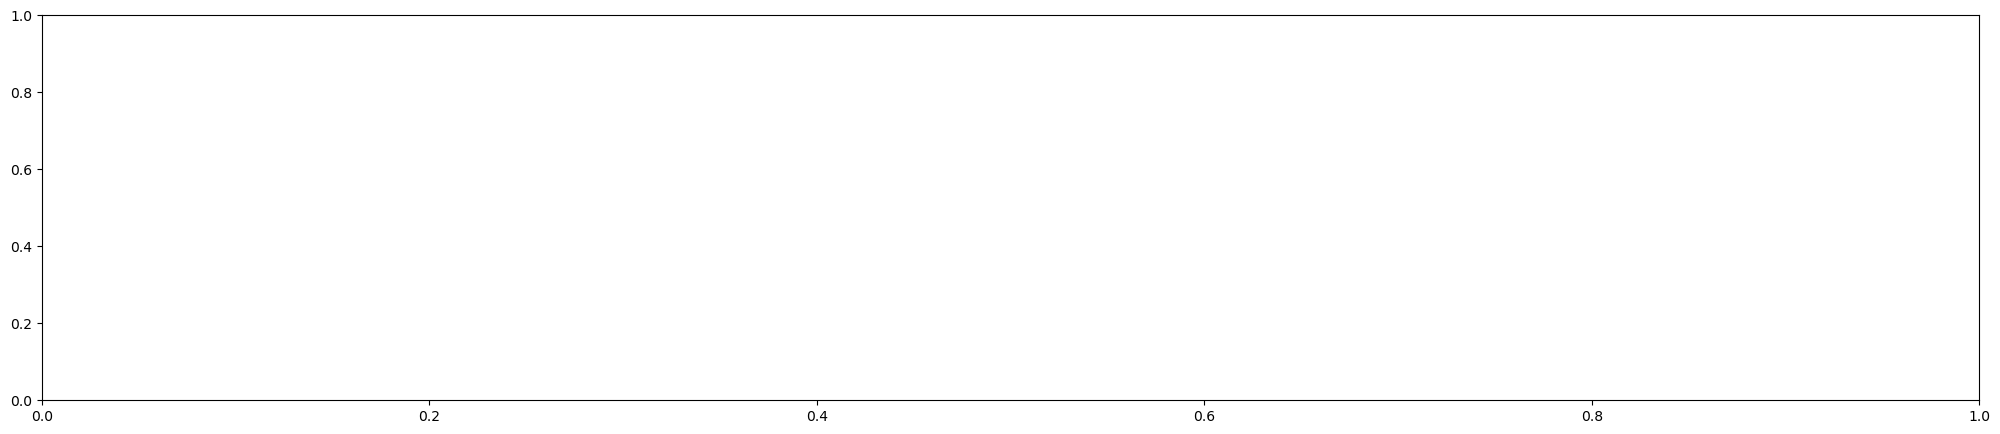

In [ ]:
merged_gdf.query("CBG == '360610143001' ").iloc[:, 4:].sum().sum()  # 360610143001: Central park
fig, ax = plt.subplots(figsize = (25, 5))
merged_gdf.query("CBG == '360610143001' ").iloc[:, 4:].T.plot(ax=ax)

In [ ]:
# df#.mean(axis=1).mean()
merged_gdf.explore()

In [ ]:
import calendar

# get the target days
def get_weekdays(year, day_list=[calendar.WEDNESDAY, calendar.SATURDAY, calendar.SUNDAY], occurrence=3):
    target_weekdays = []
    # print(year)

    for month in months:  # Iterate through months (1 to 12)
        _, last_day = calendar.monthrange(year, month)  # Get the last day of the month
        weekdays = [calendar.weekday(year, month, day) for day in range(1, last_day + 1)]  # get the weekdays (0 - 6) of each day in this month
        # print(weekdays)
        # print("len of weekdays:", len(weekdays))

        # Find the third occurrence of target weekdays, e.g., Wednesday, Saturday, and Sunday
        for weekday in day_list:
            # print(weekday)
            occurrences = [day for day, wday in enumerate(weekdays, start=1) if wday == weekday]
            # print(occurrences)
            if len(occurrences) >= occurrence:
                day_name = calendar.day_name[calendar.weekday(year, month, occurrences[2])]
                day_dict = {"month": month, "day": occurrences[2], "day_name": day_name}
                target_weekdays.append(day_dict)
                # print(day_dict)

    return target_weekdays


year = 2022
third_weekdays_2022 = get_weekdays(year, day_list=[calendar.WEDNESDAY, calendar.SATURDAY, calendar.SUNDAY], occurrence=3)
    
third_weekdays_2022

In [ ]:
import calendar

def get_all_days_in_month(year, month):
    """
    Generate all days in a given month.

    Returns:
        List of dicts:
        [
            {"month": int, "day": int, "day_name": str},
            ...
        ]
    """
    _, last_day = calendar.monthrange(year, month)

    day_list = []
    for day in range(1, last_day + 1):
        day_name = calendar.day_name[calendar.weekday(year, month, day)]
        day_list.append({
            "month": month,
            "day": day,
            "day_name": day_name
        })

    return day_list

year = 2022
month = 1  # January

all_days_jan_2022 = get_all_days_in_month(year, month)
all_days_jan_2022 



[{'month': 1, 'day': 1, 'day_name': 'Saturday'},
 {'month': 1, 'day': 2, 'day_name': 'Sunday'},
 {'month': 1, 'day': 3, 'day_name': 'Monday'},
 {'month': 1, 'day': 4, 'day_name': 'Tuesday'},
 {'month': 1, 'day': 5, 'day_name': 'Wednesday'},
 {'month': 1, 'day': 6, 'day_name': 'Thursday'},
 {'month': 1, 'day': 7, 'day_name': 'Friday'},
 {'month': 1, 'day': 8, 'day_name': 'Saturday'},
 {'month': 1, 'day': 9, 'day_name': 'Sunday'},
 {'month': 1, 'day': 10, 'day_name': 'Monday'},
 {'month': 1, 'day': 11, 'day_name': 'Tuesday'},
 {'month': 1, 'day': 12, 'day_name': 'Wednesday'},
 {'month': 1, 'day': 13, 'day_name': 'Thursday'},
 {'month': 1, 'day': 14, 'day_name': 'Friday'},
 {'month': 1, 'day': 15, 'day_name': 'Saturday'},
 {'month': 1, 'day': 16, 'day_name': 'Sunday'},
 {'month': 1, 'day': 17, 'day_name': 'Monday'},
 {'month': 1, 'day': 18, 'day_name': 'Tuesday'},
 {'month': 1, 'day': 19, 'day_name': 'Wednesday'},
 {'month': 1, 'day': 20, 'day_name': 'Thursday'},
 {'month': 1, 'day': 21, 

In [ ]:
# CBG_place_hourly_gdf
# df
# CBG2019_gdf
# df
# CBG2019_gdf.merge(df, left_on='GEOID', right_on='CBG')
# merged_gdf
# merged_gdf[['CBG', 'geometry']]
# CBG_place_hourly_gdf
# merged_gdf
# CBG_place_hourly_gdf
merged_gdf.iloc[4:]#.max()

GEOID                                           geometry  \
128175  360610064005  POLYGON ((-73.98091 40.73789, -73.9785 40.7367...   
128176  360610048002  POLYGON ((-73.98536 40.73579, -73.98478 40.735...   
128177  360610054003  POLYGON ((-73.99634 40.73804, -73.99312 40.736...   
128178  360610059004  POLYGON ((-73.9943 40.73217, -73.99327 40.7317...   
128179  360610061002  POLYGON ((-73.99332 40.7333, -73.99279 40.7339...   
...              ...                                                ...   
143009  360610136001  POLYGON ((-73.9508 40.77493, -73.95034 40.7755...   
143010  360610136002  POLYGON ((-73.95172 40.77366, -73.95126 40.774...   
143011  360610137002  POLYGON ((-73.97954 40.7662, -73.9767 40.765, ...   
143012  360610138002  POLYGON ((-73.95587 40.77624, -73.95363 40.775...   
143013  360610138003  POLYGON ((-73.95678 40.77499, -73.95633 40.775...   

       county_FIPS           CBG  2022-01-19 00:00:00  2022-01-19 01:00:00  \
128175       36061  360610064005               1750.0               1625.0   
128176       36061  360610048002                800.0                806.0   
128177       36061  360610054003               1846.0               2040.0   
128178       36061  360610059004                857.0                883.0   
128179       36061  360610061002               1611.0               1336.0   
...            ...           ...                  ...                  ...   
143009       36061  360610136001               2110.0               2256.0   
143010       36061  360610136002               1440.0               1493.0   
143011       36061  360610137002                692.0                430.0   
143012       36061  360610138002               2286.0               2211.0   
143013       36061  360610138003               1167.0               1020.0   

        2022-01-19 02:00:00  2022-01-19 03:00:00  2022-01-19 04:00:00  \
128175               1637.0               1949.0               1636.0   
128176                955.0                809.0                954.0   
128177               1900.0               1906.0               1898.0   
128178                895.0                899.0                893.0   
128179               1347.0               1350.0               1495.0   
...                     ...                  ...                  ...   
143009               2320.0               2508.0               2313.0   
143010               1517.0               1191.0               1180.0   
143011                436.0                439.0                436.0   
143012               2575.0               2751.0               2571.0   
143013               1029.0               1032.0               1028.0   

        2022-01-19 05:00:00  ...  2022-01-19 14:00:00  2022-01-19 15:00:00  \
128175               1916.0  ...               3026.0               3684.0   
128176                949.0  ...               1445.0                984.0   
128177               2332.0  ...               2710.0               3662.0   
128178                868.0  ...               1431.0                693.0   
128179               1322.0  ...               1709.0               2065.0   
...                     ...  ...                  ...                  ...   
143009               2173.0  ...               1000.0               1607.0   
143010               1296.0  ...               2508.0               1469.0   
143011                422.0  ...               1311.0               1394.0   
143012               2487.0  ...               3935.0               2135.0   
143013               1009.0  ...               1385.0               1310.0   

        2022-01-19 16:00:00  2022-01-19 17:00:00  2022-01-19 18:00:00  \
128175               1671.0               2126.0               2218.0   
128176               1419.0               1126.0               1145.0   
128177               1918.0               2068.0               2815.0   
128178                678.0                354.0                916.0  

In [ ]:
# get the place code list by the LandScan daytime population
groupped_df = CBG_place_hourly_gdf.groupby(['NAMELSAD', 'STUSPS', 'place'])['landscan_day'].sum().sort_values(ascending=False).to_frame().reset_index()
sorted_place_list = groupped_df['place'].to_list()
print(len(sorted_place_list))

11847


## Generating map

In [ ]:
place_name = "Manhattan, NY"
# place_name = "State College, PA"
# place_name = 'Myrtle Beach, SC'
# place_name = 'Columbia, SC'
# place_name = 'Ocean City, MD'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_target_gdf(year, month, day, df):
    # print(year, month, day)
    hourly_index = pd.date_range(start=f'{year}-{month:02}-{day:02}', end=f'{year}-{month:02}-{day:02} 23:00:00', freq='H')
    # print("hourly_index:", hourly_index)
    df = df[hourly_index]
    # vmax = df.mean(axis=1).mean() + df.mean(axis=1).std() * 3
    # print("vmax:", vmax)
    merged_gdf = CBG2019_gdf.merge(df, left_on='GEOID', right_index=True)
    
    return hourly_index, merged_gdf
 

def draw_map(hourly_index, merged_gdf, df, day_dict):     
        
    place_name = f"{df.iloc[0]['NAME']}, {df.iloc[0]['STATE_NAME']}"
    row_cnt = 3
    col_cnt = 9
 

    fig = plt.figure(figsize=(20, 7.5))
    ax_idx = 0
    
    if len(df) > 2:
    
        vmax = merged_gdf.iloc[:, 4:].mean(axis=1).mean() + merged_gdf.iloc[:, 4:].mean(axis=1).std() * 3
        vmin = 0
    else: 
        vmax = merged_gdf.iloc[:, 4:].max(axis=1).max()
        vmin = 0
    
    # print('vmax:', vmax)
    # print('vmin:', vmin)

    cmap = 'viridis'
    hour_column = 0

    for row in range(1, row_cnt + 1):    
        for col in range(1, col_cnt + 1):   
            ax_idx += 1
            if col == (col_cnt):
                # print("skip: col = ", col)
                continue                  
            # print("row, col, ax_idx, hour_column:", row, col, ax_idx, hour_column)

            ax = fig.add_subplot(row_cnt, col_cnt, ax_idx)
            ax.axis('off')
            ax.set_title(f"{hour_column:02}:00:00")

            merged_gdf.plot(column=hourly_index[hour_column],  ax=ax, vmax=vmax, cmap=cmap, vmin=vmin) 
            # merged_gdf.plot(column=hourly_index[hour_column],  ax=ax, cmap=cmap)
            # print("merged_gdf:", merged_gdf)
            # print("hourly_index[hour_column]:", hourly_index[hour_column])
            # print("hour_column:", hour_column)

            hour_column = hour_column + 1

            if hour_column == 24:
                break
        if hour_column == 24:
            break    
            
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
    ACS_LandScan_gdf = merged_gdf[['CBG', 'geometry']].merge(ACS_df.loc[df.index], left_on='CBG', right_index=True)
    # print(ACS_LandScan_gdf)

    ax = fig.add_subplot(2, col_cnt,  9)
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    ACS_popu_df = ACS_LandScan_gdf.plot(column='totalpopulation',  ax=ax, vmax=vmax, vmin=vmin, cmap=cmap)
    new_position = [0.87, 0.56, 0.12, 0.35]  # [left, bottom, width, height]
    ax.set_position(new_position)


    # hourly population
    ax = fig.add_subplot(2, col_cnt,  18)
#     # ax.axis('off')
    hourly_popu_list = merged_gdf[hourly_index].sum().to_list()
    ax.plot(hourly_popu_list, label='Hourly')
    ax.axhline(ACS_LandScan_gdf['totalpopulation'].sum(), color='green', label='ACS 2019')
    ax.axhline(ACS_LandScan_gdf['landscan_day'].sum(), color='orange', label='LandScan Daytime')
    ax.axhline(ACS_LandScan_gdf['landscan_night'].sum(), color='black', label='LandScan Nighttime')
    ax.set_title('Population')
    ax.legend(framealpha=0.1, edgecolor="0.1")
    new_position = [0.87, 0.15, 0.12, 0.39]  # [left, bottom, width, height]
    ax.set_position(new_position)

    fig.suptitle(f"{place_name} Hourly Population ({year:04}-{month:02}-{day:02}, {day_dict['day_name']})", fontsize=20)

    

    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    # pos1 = axs[0, 0].get_position() # get the original position for first axis
    # pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([0.07, 0.14, 0.007, 0.74])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = vmin

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='vertical')

    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)

    cbar.set_label('Population', labelpad=-65,   rotation=90, fontsize=14, loc='center')

    png_name = os.path.join(save_path, f"{place_name.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_{day_dict['day_name']}_{df.iloc[0]['place']}_v4.png")
     
     
    plt.savefig(png_name, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.close()
    
    print("PNG name:", png_name)

 
total_place = CBG_place_hourly_gdf['place'].nunique()

processed_cnt = 0


# get the place code list by the LandScan daytime population
groupped_df = CBG_place_hourly_gdf.groupby(['NAMELSAD', 'STUSPS', 'place'])['landscan_day'].sum().sort_values(ascending=False).to_frame().reset_index()
sorted_place_list = groupped_df['place'].to_list()

# for idx, df in CBG_place_hourly_gdf.groupby(['NAMELSAD', 'STUSPS', 'place']): 
# for idx, df in CBG_place_hourly_gdf.query('NAME == "Myrtle Beach" ').groupby(['NAMELSAD', 'STUSPS', 'place']): 
# df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]

for idx, place_code in enumerate(sorted_place_list):
    # df = CBG_place_hourly_gdf.query(f'place == "{place_code}" ')
    df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]  # Manhattan, NY
    # df = CBG_place_hourly_gdf.query('NAME == "State College" ')

    print(f"Processing {idx + 1} / {total_place}: {df.iloc[0][['NAMELSAD', 'STUSPS', 'place']].to_list()}")

    df = df.set_index("CBG")
    
    mini_popu_ratio = 0.1
    ACS_popu = df.iloc[0]['totalpopulation']
    df.iloc[:, 10:] = df.iloc[:, 10:].mask(df.iloc[:, 10:] < 0, ACS_popu * mini_popu_ratio)
    
    # for day_dict in third_weekdays_2022:
    for day_dict in all_days_jan_2022[18:19]:
        try:
            month = day_dict['month']
            day = day_dict['day']
            hourly_index, merged_gdf = get_target_gdf(year, month, day, df)
            print(year, month, day)
            draw_map(hourly_index, merged_gdf, df, day_dict)
        except Exception as e:
            print(e)
            # break
            # continue
            
    processed_cnt += 1
    
    break

Processing 1 / 11847: ['New York city', 'NY', '3651000']
2022 1 19
PNG name: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\maps\New York_New York_hourly_population_20220119_Wednesday_3651000_v4.png


### 4 rows

In [ ]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

# =========================================================
# Get target hourly GeoDataFrame
# =========================================================
def get_target_gdf(year, month, day, df):

    hourly_index = pd.date_range(
        start=f'{year}-{month:02}-{day:02}',
        end=f'{year}-{month:02}-{day:02} 23:00:00',
        freq='H'
    )

    df = df[hourly_index]
    merged_gdf = CBG2019_gdf.merge(df, left_on='GEOID', right_index=True)

    return hourly_index, merged_gdf


# =========================================================
# Draw hourly population maps (4 × 6 tight layout)
# =========================================================
def draw_map(hourly_index, merged_gdf, df, day_dict):

    place_name = f"{df.iloc[0]['NAME']}, {df.iloc[0]['STATE_NAME']}"

    # -----------------------------------------------------
    # Figure and axes
    # -----------------------------------------------------
    fig, axs = plt.subplots(
        nrows=4,
        ncols=6,
        figsize=(17, 14),
        constrained_layout=False
    )
    axs = axs.flatten()

    # -----------------------------------------------------
    # Color scale
    # -----------------------------------------------------
    if len(df) > 2:
        mean_val = merged_gdf.iloc[:, 4:].mean(axis=1)
        vmax = mean_val.mean() + mean_val.std() * 3
    else:
        vmax = merged_gdf.iloc[:, 4:].max(axis=1).max()

    vmin = 0
    cmap = "viridis"

    # -----------------------------------------------------
    # Shared spatial extent (critical for tight layout)
    # -----------------------------------------------------
    xmin, ymin, xmax, ymax = merged_gdf.total_bounds

    # -----------------------------------------------------
    # Hourly maps
    # -----------------------------------------------------
    for hour in range(24):
        ax = axs[hour]
        ax.axis("off")

        merged_gdf.plot(
            column=hourly_index[hour],
            ax=ax,
            cmap=cmap,
            vmax=vmax,
            vmin=vmin,
            linewidth=0.1,
        )

        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.margins(0)

        ax.set_title(f"{hour:02}:00", fontsize=8, pad=1)

    # -----------------------------------------------------
    # Tight spacing for hourly grid
    # -----------------------------------------------------
    plt.subplots_adjust(
        left=0.08,
        right=0.83,
        top=0.92,
        bottom=0.08,
        wspace=0.01,
        hspace=0.04
    )

    # =====================================================
    # ACS + LandScan reference map
    # =====================================================
    ACS_LandScan_gdf = (
        merged_gdf[['CBG', 'geometry']]
        .merge(ACS_df.loc[df.index], left_on='CBG', right_index=True)
    )

    ax_acs = fig.add_axes([0.88, 0.55, 0.13, 0.35])
    ax_acs.axis("off")
    ax_acs.set_title("ACS 2019 Population", fontsize=11)

    ACS_LandScan_gdf.plot(
        column="totalpopulation",
        ax=ax_acs,
        cmap=cmap,
        vmax=vmax,
        vmin=vmin,
        linewidth=0.1,
    )

    ax_acs.set_xlim(xmin, xmax)
    ax_acs.set_ylim(ymin, ymax)
    ax_acs.margins(0)

    # =====================================================
    # Hourly population line plot
    # =====================================================
    ax_line = fig.add_axes([0.88, 0.12, 0.13, 0.35])

    hourly_popu_list = merged_gdf[hourly_index].sum().to_list()

    ax_line.plot(hourly_popu_list, label="Hourly")
    ax_line.axhline(
        ACS_LandScan_gdf["totalpopulation"].sum(),
        color="green",
        label="ACS 2019",
    )
    ax_line.axhline(
        ACS_LandScan_gdf["landscan_day"].sum(),
        color="orange",
        label="LandScan Daytime",
    )
    ax_line.axhline(
        ACS_LandScan_gdf["landscan_night"].sum(),
        color="black",
        label="LandScan Nighttime",
    )

    ax_line.set_title("Population", fontsize=11)
    ax_line.legend(framealpha=0.1, edgecolor="0.1", fontsize=9)

    # =====================================================
    # Suptitle
    # =====================================================
    fig.suptitle(
        f"{place_name} Hourly Population "
        f"({year:04}-{month:02}-{day:02}, {day_dict['day_name']})",
        fontsize=18,
        y=0.97
    )

    # =====================================================
    # Colorbar (aligned to hourly grid)
    # =====================================================
    cax = fig.add_axes([0.05, 0.08, 0.012, 0.84])

    sm = plt.cm.ScalarMappable(
        cmap=cmap,
        norm=plt.Normalize(vmin=vmin, vmax=vmax),
    )
    sm._A = []

    cbar = plt.colorbar(sm, cax=cax, orientation="vertical")
    cbar.set_label("Population", rotation=90, fontsize=12)

    # =====================================================
    # Save
    # =====================================================
    png_name = os.path.join(
        save_path,
        f"{place_name.replace(', ', '_')}_hourly_population_"
        f"{year}{month:02}{day:02}_{day_dict['day_name']}_"
        f"{df.iloc[0]['place']}_tight_v1.png",
    )

    plt.savefig(png_name, dpi=120, bbox_inches="tight", pad_inches=0.15)
    plt.close()

    print("PNG saved:", png_name)


# =========================================================
# Example driver (Manhattan test)
# =========================================================
df = CBG_place_hourly_gdf[CBG_place_hourly_gdf['CBG'].str.startswith('36061')]
df = df.set_index("CBG")

mini_popu_ratio = 0.1
ACS_popu = df.iloc[0]['totalpopulation']
df.iloc[:, 10:] = df.iloc[:, 10:].mask(
    df.iloc[:, 10:] < 0,
    ACS_popu * mini_popu_ratio
)

for day_dict in third_weekdays_2022:
    month = day_dict['month']
    day = day_dict['day']

    hourly_index, merged_gdf = get_target_gdf(year, month, day, df)
    draw_map(hourly_index, merged_gdf, df, day_dict)

    break  # test one day


PNG saved: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\maps\New York_New York_hourly_population_20220119_Wednesday_3651000_tight_v1.png


In [ ]:
df.iloc[:, 10:]
mini_popu_ratio = 0.1
ACS_popu = df.iloc[0]['totalpopulation']
df.iloc[:, 10:] = df.iloc[:, 10:].mask(df.iloc[:, 10:] < 0, ACS_popu * mini_popu_ratio)
df

sub_area_ratio    place      NAME       NAMELSAD STUSPS  \
CBG                                                                     
360610078001             1.0  3651000  New York  New York city     NY   
360610050004             1.0  3651000  New York  New York city     NY   
360610044007             1.0  3651000  New York  New York city     NY   
360610063004             1.0  3651000  New York  New York city     NY   
360610064005             1.0  3651000  New York  New York city     NY   
...                      ...      ...       ...            ...    ...   
360610136001             1.0  3651000  New York  New York city     NY   
360610136002             1.0  3651000  New York  New York city     NY   
360610137002             1.0  3651000  New York  New York city     NY   
360610138002             1.0  3651000  New York  New York city     NY   
360610138003             1.0  3651000  New York  New York city     NY   

             STATE_NAME                                           geometry  \
CBG                                                                          
360610078001   New York  MULTIPOLYGON (((-73.97497 40.74850, -73.97359 ...   
360610050004   New York  MULTIPOLYGON (((-73.98829 40.73466, -73.98782 ...   
360610044007   New York  MULTIPOLYGON (((-73.98156 40.73264, -73.98084 ...   
360610063004   New York  MULTIPOLYGON (((-73.99902 40.73415, -73.99862 ...   
360610064005   New York  MULTIPOLYGON (((-73.97850 40.73679, -73.97891 ...   
...                 ...                                                ...   
360610136001   New York  MULTIPOLYGON (((-73.95034 40.77556, -73.94982 ...   
360610136002   New York  MULTIPOLYGON (((-73.95126 40.77429, -73.95078 ...   
360610137002   New York  MULTIPOLYGON (((-73.97670 40.76500, -73.97720 ...   
360610138002   New York  MULTIPOLYGON (((-73.95363 40.77529, -73.95409 ...   
360610138003   New York  MULTIPOLYGON (((-73.95633 40.77560, -73.95409 ...   

              totalpopulation  landscan_day  landscan_night  ...  \
CBG                                                          ...   
360610078001             1627        2266.0          1107.0  ...   
360610050004              919        2595.0          1674.0  ...   
360610044007             3098         940.0          2533.0  ...   
360610063004             1004        1253.0           592.0  ...   
360610064005             1664         748.0           278.0  ...   
...                       ...           ...             ...  ...   
360610136001             2455        1488.0          2389.0  ...   
360610136002             1232        1383.0          1657.0  ...   
360610137002              450        4120.0           631.0  ...   
360610138002             2332         554.0           914.0  ...   
360610138003             1047         847.0           510.0  ...   

              2022-12-31 14:00:00  2022-12-31 15:00:00  2022-12-31 16:00:00  \
CBG                                                                           
360610078001               1266.0                806.0                868.0   
360610050004                950.0                837.0               1189.0   
360610044007                309.0                162.7                309.0   
360610063004                464.0                474.0                919.0   
360610064005                267.0               1070.0                519.0   
...                           ...                  ...                  ...   
360610136001                245.0                198.0                245.0   
360610136002                123.0                481.0                493.0   
360610137002               4434.0               3684.0               2272.0   
360610138002                233.0                233.0                233.0   
360610138003                117.0                162.7                304.0   

              2022-12-31 17:00:00  2022-12-31 18:00:00  2022-12-31 19:00:00  \
CBG                                                      

<Axes: >

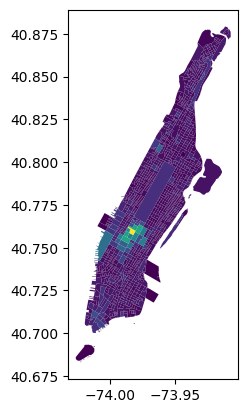

In [ ]:
fig, ax = plt.subplots()
merged_gdf.plot(column=hourly_index[22],  ax=ax ) 

In [ ]:
total_place = CBG_place_hourly_gdf['place'].nunique()
processed_cnt = 0
for idx, df in CBG_place_hourly_gdf.groupby(['NAMELSAD', 'STUSPS', 'place']):
    processed_cnt += 1
    if processed_cnt < 695:
        continue
    print(f"Processing {processed_cnt} / {total_place}: {idx}")
    plot_population(df)
    # break

TypeError: 'value' must be an instance of str or bytes, not a pandas._libs.tslibs.timestamps.Timestamp

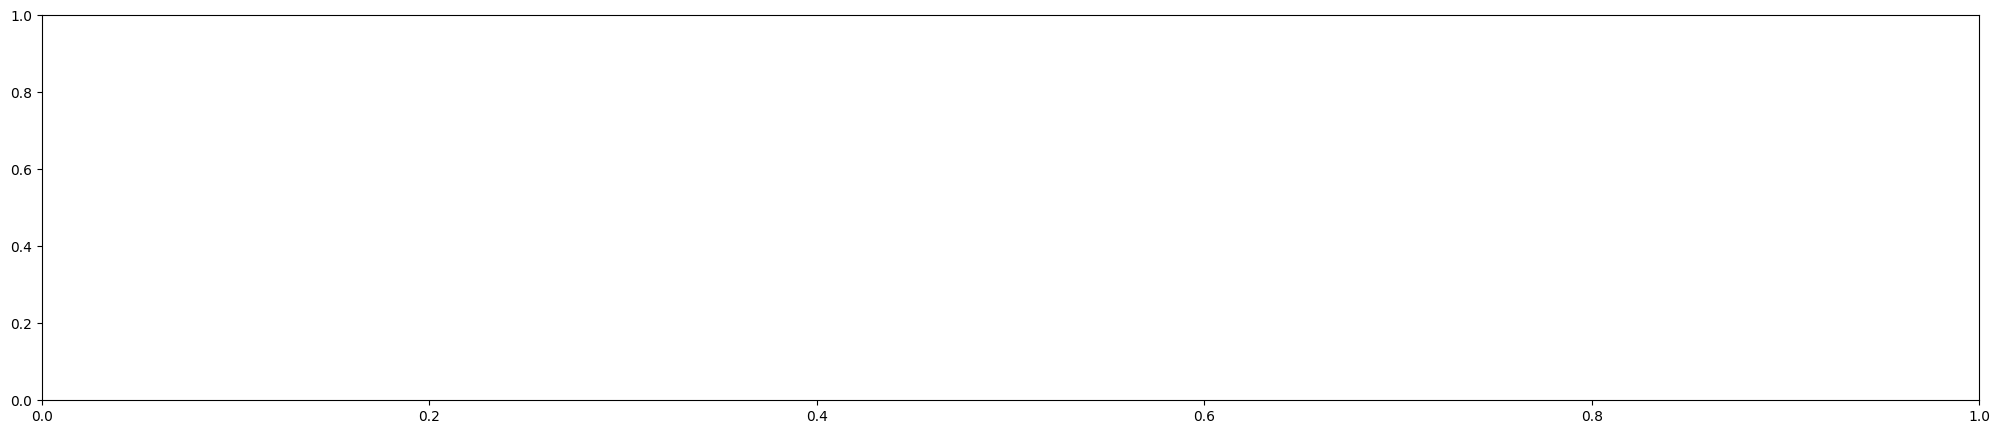

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (25, 5))
sum_series = df.iloc[:, 8:].sum()

ACS_popu = sum_series.iloc[0]
sum_series = sum_series.mask(sum_series < 0, ACS_popu)

plt.plot(sum_series.iloc[1:])
plt.axhline(y =ACS_popu, color = 'r', linestyle = '-', lw=0.3) 

hourly_index = pd.date_range(start='2022-01-01', end='2022-12-31 23:00:00', freq='H')
for start in hourly_index[hourly_index.weekday >= 5]:
    plt.axvspan(start, start + pd.Timedelta(days=1), color='lightgrey', alpha=0.1)
    
sum_series

In [ ]:
sum_series.iloc[1:].rolling(window=24, min_periods=1).mean()

In [ ]:
df

In [ ]:
STOP

# Tools

# Creating the mapping between Places and Census block groups

In [ ]:
CBG_boundary_2019 = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\blockgoups\blockgoups2019.shp'
place_boundary_2019 = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\cb_2023_us_place_500k.zip"

In [ ]:
CBG_gdf = gpd.read_file(CBG_boundary_2019)
CBG_gdf

In [ ]:
place_gdf = gpd.read_file(place_boundary_2019)
place_gdf

In [ ]:
CBG_gdf['area_deg'] = CBG_gdf.area
CBG_gdf

In [ ]:
inter_gdf = CBG_gdf.overlay(place_gdf, how='intersection')
inter_gdf

In [ ]:
inter_gdf['sub_area_deg'] = inter_gdf.area
inter_gdf['sub_area_ratio'] = inter_gdf['sub_area_deg'] / inter_gdf['area_deg']

inter_gdf

In [ ]:
inter_gdf.query('sub_area_ratio > 0.5')

In [ ]:
saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\vectors\CBG_place.gpkg'
inter_gdf[['sub_area_ratio', 'GEOID_1', 'GEOID_2', 'NAME', 'NAMELSAD', 'STUSPS', 'STATE_NAME', 'geometry']].rename(columns={"GEOID_1":"CBG", "GEOID_2":"place"}).query('sub_area_ratio > 0.5').to_file(saved_fname, driver="GPKG")